<a href="https://colab.research.google.com/github/josephlaurel/TikTokInfluencerClassifier/blob/main/TikTok_Influencer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

In [43]:
## Mount Google Drive that contains this notebook
#from google.colab import drive
#drive.mount('/content/drive')

In [10]:
#cd '/content/drive/My Drive/Colab Notebooks/'

In [11]:
## Clone the git file from Github
#!git clone https://github.com/josephlaurel/TikTokInfluencerClassifier.git

In [12]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
# from django.urls import include # needed if you will use hosted runtime

sns.set(rc={'figure.figsize':(20,10)}, palette="Blues", style='white')

from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix

In [13]:
#Import additional libraries

import os
from scipy.stats import norm

In [14]:
## Upload dataset from local drive via hosted runtime
#from google.colab import files
#uploaded = files.upload()

In [15]:
# Load dataset via local runtime
data = pd.read_excel('/Users/josephlaurel/Desktop/Data Science/Analytiks/Capstone_Project/6882_rows.xlsx')

# Refer to this article on how to enable local runtime on Colab: https://research.google.com/colaboratory/local-runtimes.html
# Refer to this Github thread on how to fix local runtime-related issues: https://github.com/jupyter/notebook/issues/3495

# Once the libraries required for local runtime are installed on your computer, run the following code in Command Prompt/Terminal to generate
# a backend URL:
#jupyter notebook \
# --NotebookApp.allow_origin='https://colab.research.google.com' \
# --port=8888 \
# --NotebookApp.port_retries=0

In [16]:
data.head()

,id,desc,descLength,countTaggedUsers,createTimePHT,dateScrapedPHT,timeGapDays,dayOfWk,timeOfDay,weekday,...,authDiggCount,duetEnabled,stitchEnabled,shareEnabled,withTextSticker,textStickerLength,effectStickerCount,COVID,erViews,influencer
0,6906000000000000000,Here‚Äôs my version of 34 + 35!! üòçüòç #343...,56,0,2020-12-14 17:00:52,2020-12-15 12:59:00,0.832037,2,3,True,...,665,True,True,True,NaN,NaN,0,0,0.125664,False
1,6905700000000000000,YT channel: This is Chibay #fyp #foryou #foryo...,51,0,2020-12-13 19:53:58,2020-12-15 12:59:00,1.711829,1,4,False,...,5210,True,True,True,NaN,NaN,0,0,0.129000,False
2,6903000000000000000,Better late than never? üòÇ #itsreallyhurts,44,0,2020-12-06 11:56:45,2020-12-15 12:59:00,9.043229,1,2,False,...,74,True,True,True,NaN,NaN,0,0,0.088317,False
3,6896400000000000000,renegay and samantha boy @sammypettit09,39,1,2020-11-18 15:56:16,2020-12-15 12:59:00,26.876898,4,3,True,...,640,True,True,True,NaN,NaN,0,0,0.121107,False
4,6902300000000000000,dc:@benibol üî•üî•üî•üî•üíÖ,32,1,2020-12-04 17:01:24,2020-12-15 12:59:00,10.831667,6,3,True,...,6049,True,True,True,NaN,NaN,0,0,0.170697,False


In [17]:
data.describe()

,id,descLength,countTaggedUsers,timeGapDays,dayOfWk,timeOfDay,height,width,duration,ratio,...,authFollowingCount,authFollowerCount,authHeartCount,authVidCount,authDiggCount,withTextSticker,textStickerLength,effectStickerCount,COVID,erViews
count,6.882000e+03,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,...,6882.000000,6.882000e+03,6.882000e+03,6882.000000,6882.000000,738.000000,738.000000,6882.000000,6882.000000,6882.000000
mean,6.889737e+18,69.987358,0.369805,31.143466,3.948997,2.784656,951.405987,575.044754,25.938390,714.577158,...,856.733362,4.026812e+06,9.385983e+07,746.845684,11648.468178,2.308943,53.161247,0.115519,0.003923,0.126523
std,1.101448e+16,43.039060,0.669671,26.043551,2.014592,1.027231,133.218727,86.906589,22.328042,35.580635,...,1924.855394,9.512295e+06,2.149518e+08,1007.090007,19832.464966,1.977335,122.359314,0.340794,0.062518,0.060778
min,6.859200e+18,0.000000,0.000000,0.101481,1.000000,1.000000,368.000000,224.000000,5.000000,360.000000,...,0.000000,2.300000e+01,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005181
25%,6.881700e+18,37.000000,0.000000,9.844389,2.000000,2.000000,960.000000,540.000000,13.000000,720.000000,...,42.000000,6.052500e+04,4.360500e+05,126.000000,1224.000000,0.000000,0.000000,0.000000,0.000000,0.085527
50%,6.891900e+18,64.000000,0.000000,22.729109,4.000000,3.000000,960.000000,576.000000,18.000000,720.000000,...,165.000000,3.959500e+05,3.400000e+06,350.000000,3967.000000,4.000000,16.500000,0.000000,0.000000,0.119792
75%,6.898300e+18,100.000000,1.000000,50.036525,6.000000,4.000000,1024.000000,576.000000,32.000000,720.000000,...,563.000000,2.500000e+06,3.330000e+07,973.000000,13100.000000,4.000000,47.750000,0.000000,0.000000,0.159135
max,6.906300e+18,255.000000,9.000000,90.039595,7.000000,4.000000,1280.000000,1280.000000,180.000000,720.000000,...,10000.000000,9.900000e+07,1.600000e+09,20600.000000,377000.000000,4.000000,1130.000000,6.000000,1.000000,0.899637


In [18]:
data.shape

(6882, 48)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   6882 non-null   int64         
 1   desc                 6602 non-null   object        
 2   descLength           6882 non-null   int64         
 3   countTaggedUsers     6882 non-null   int64         
 4   createTimePHT        6882 non-null   datetime64[ns]
 5   dateScrapedPHT       6882 non-null   datetime64[ns]
 6   timeGapDays          6882 non-null   float64       
 7   dayOfWk              6882 non-null   int64         
 8   timeOfDay            6882 non-null   int64         
 9   weekday              6882 non-null   bool          
 10  weekend              6882 non-null   bool          
 11  height               6882 non-null   int64         
 12  width                6882 non-null   int64         
 13  duration             6882 non-nul

In [20]:
data.columns

Index(['id', 'desc', 'descLength', 'countTaggedUsers', 'createTimePHT',
       'dateScrapedPHT', 'timeGapDays', 'dayOfWk', 'timeOfDay', 'weekday',
       'weekend', 'height', 'width', 'duration', 'ratio', 'authorID',
       'username', 'nickname', 'authorVerified', 'authorDuetSetting',
       'authorStitchSetting', 'musicID', 'musicTitle', 'musicOriginal',
       'challengeCount', 'vidHeartCount', 'vidShareCount', 'vidCommentCount',
       'vidPlayCount', 'duetFromId', 'isDuet', 'isReply', 'hashtagCount',
       'itemCommentStatus', 'authFollowingCount', 'authFollowerCount',
       'authHeartCount', 'authVidCount', 'authDiggCount', 'duetEnabled',
       'stitchEnabled', 'shareEnabled', 'withTextSticker', 'textStickerLength',
       'effectStickerCount', 'COVID', 'erViews', 'influencer'],
      dtype='object')

In [21]:
to_convert = ['id','authorID','authorDuetSetting','authorStitchSetting','musicID','isDuet', 'isReply', 'itemCommentStatus', 'COVID'] 

data[to_convert] = data[to_convert].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   6882 non-null   category      
 1   desc                 6602 non-null   object        
 2   descLength           6882 non-null   int64         
 3   countTaggedUsers     6882 non-null   int64         
 4   createTimePHT        6882 non-null   datetime64[ns]
 5   dateScrapedPHT       6882 non-null   datetime64[ns]
 6   timeGapDays          6882 non-null   float64       
 7   dayOfWk              6882 non-null   int64         
 8   timeOfDay            6882 non-null   int64         
 9   weekday              6882 non-null   bool          
 10  weekend              6882 non-null   bool          
 11  height               6882 non-null   int64         
 12  width                6882 non-null   int64         
 13  duration             6882 non-nul

## Check for Duplicate Data

In [22]:
data.duplicated(subset=['desc']).value_counts()

False    6482
True      400
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
data['desc'].value_counts().nlargest(20)

#fyp                                                                                                                               13
Wow ü§© #foryoupage #foryou                                                                                                       10
This make my cry üò≠ #foryoupage #foryou                                                                                           8
Can you do this ü§© #foryoupage #foryou                                                                                            7
Wait for it üòÇ #foryoupage #foryou                                                                                                7
Do you have a grandma üëµ #foryoupage #foryou                                                                                      5
#0324MYTest                                                                                                                         5
#hottawchallenge                                              

## Check for Missing Data

In [25]:
#missing data

#Gets the total number of missing data
total = data.isnull().sum().sort_values(ascending=False)

#Get % of Null
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
textStickerLength,6144,0.892764
withTextSticker,6144,0.892764
duetFromId,4913,0.713891
desc,280,0.040686
influencer,0,0.000000
height,0,0.000000
authorDuetSetting,0,0.000000
authorVerified,0,0.000000
nickname,0,0.000000
username,0,0.000000


In [26]:
data_temp = data.fillna({'textStickerLength' : np.nan, 'withTextSticker' :np.nan, 'duetFromId' : np.nan, 'desc' :'None'})

In [27]:
# Check whether the blank cells were filled

#Gets the total number of missing data
total = data_temp.isnull().sum().sort_values(ascending=False)

#Get % of Null
percent = (data_temp.isnull().sum()/data_temp.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(5)

,Total,Percent
textStickerLength,6144,0.892764
withTextSticker,6144,0.892764
duetFromId,4913,0.713891
influencer,0,0.000000
height,0,0.000000


## Split the Dataset into Categorical and Numerical Features

In [28]:
# Categorical features only
df_cat = data_temp[['id', 'desc', 'dayOfWk', 'timeOfDay', 'weekday',
       'weekend', 'authorID',
       'username', 'nickname', 'authorVerified', 'authorDuetSetting',
       'authorStitchSetting', 'musicID', 'musicTitle', 'musicOriginal',
       'duetFromId', 'isDuet', 'isReply',
       'itemCommentStatus', 'duetEnabled',
       'stitchEnabled', 'shareEnabled', 'withTextSticker', 'COVID', 'influencer']]

# Numerical features only
df_num = data_temp.drop(['id', 'desc', 'timeGapDays', 'dayOfWk', 'timeOfDay', 'weekday',
       'weekend', 'authorID',
       'username', 'nickname', 'authorVerified', 'authorDuetSetting',
       'authorStitchSetting', 'musicID', 'musicTitle', 'musicOriginal',
       'duetFromId', 'isDuet', 'isReply',
       'itemCommentStatus', 'duetEnabled',
       'stitchEnabled', 'shareEnabled', 'withTextSticker', 'COVID', 'influencer'], axis=1)

## Explore Categorical Data

In [29]:
#Check the Number of Categorical Features
df_cat.shape

(6882, 25)

In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   6882 non-null   category
 1   desc                 6882 non-null   object  
 2   dayOfWk              6882 non-null   int64   
 3   timeOfDay            6882 non-null   int64   
 4   weekday              6882 non-null   bool    
 5   weekend              6882 non-null   bool    
 6   authorID             6882 non-null   category
 7   username             6882 non-null   object  
 8   nickname             6882 non-null   object  
 9   authorVerified       6882 non-null   bool    
 10  authorDuetSetting    6882 non-null   category
 11  authorStitchSetting  6882 non-null   category
 12  musicID              6882 non-null   category
 13  musicTitle           6882 non-null   object  
 14  musicOriginal        6882 non-null   bool    
 15  duetFromId           

In [31]:
#Describe the Categorical Features. Check if Number of Unique Values is as expected. 
df_cat.describe(include=['object', 'bool', 'category', 'int64'])

#Can drop shareEnabled because all videos had sharing enabled

#Possible explanation why the count of musicTitle is less than that of musicID - some users may have reuploaded the same sound clips

,id,desc,dayOfWk,timeOfDay,weekday,weekend,authorID,username,nickname,authorVerified,...,musicTitle,musicOriginal,isDuet,isReply,itemCommentStatus,duetEnabled,stitchEnabled,shareEnabled,COVID,influencer
count,6.882000e+03,6882,6882.000000,6882.000000,6882,6882,6.882000e+03,6882,6882,6882,...,6882,6882,6882.0,6882.0,6882.0,6882,6882,6882,6882.0,6882
unique,4.390000e+02,6482,NaN,NaN,2,2,3.370000e+03,3385,3382,2,...,2649,2,2.0,2.0,2.0,2,2,1,2.0,2
top,6.906000e+18,None,NaN,NaN,True,False,6.780794e+18,green.rabbit,Jeffrey mensen,False,...,original sound,True,0.0,0.0,0.0,True,True,True,0.0,False
freq,8.000000e+01,280,NaN,NaN,4939,4939,2.900000e+02,290,280,4951,...,1227,5573,6429.0,6460.0,6837.0,6388,6148,6882,6855.0,6640
mean,NaN,NaN,3.948997,2.784656,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.014592,1.027231,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Check whether each id corresponds to a unique video
data_temp.groupby(['id', 'createTimePHT'])['nickname'].value_counts().nlargest(20)

#Some ids correspond to multiple unique videos

id                   createTimePHT        nickname                  
6859200000000000000  2020-08-10 11:43:37  Alena Danaya Amihan pirena    1
6859400000000000000  2020-08-11 02:55:20  Eric                          1
6859500000000000000  2020-08-11 06:11:10  addison rae                   1
6859900000000000000  2020-08-12 08:26:25  addison rae                   1
6860300000000000000  2020-08-13 12:37:20  Mia Khalifa                   1
6860600000000000000  2020-08-14 09:26:32  addison rae                   1
6860700000000000000  2020-08-14 11:51:23  Pamela Dianne Esguerra        1
                     2020-08-14 13:44:21  Naruto Uzumaki                1
6860900000000000000  2020-08-15 00:02:58  charli d‚Äôamelio             1
6861100000000000000  2020-08-15 14:06:47  Mar‚ú∞Vin                     1
                     2020-08-15 14:39:52  Jen Barangan                  1
                     2020-08-15 15:03:19  charli d‚Äôamelio             1
6861200000000000000  2020-08-15 19:25:51  J

In [33]:
#Check why authorID, username, and nickname don't have the same counts
data_temp.groupby(['authorID', 'nickname'])['username'].value_counts().nlargest(20) #.loc[lambda x: x>1]

authorID             nickname                 username      
6780793711066612742  Jeffrey mensen           green.rabbit      280
175468248220520448   Shauni ü¶ã              itzshauni         236
6578490402956443653  Ca√≠n Guzm√°n            cainguzman        193
6717651461067604997  YZ                       youneszarou       102
6557575362090729473  Simply_Thess             simply_thess       65
6804783597552239621  üå∏Lisaandlenaüå∏      lisaandlena        46
21609287             Jason Derulo             jasonderulo        44
6802211320437474306  yraü§ñ                  yragarcia_         38
6784006171563164674  Hazel Grace              queenluvs14        37
100481652413403136   ROMINA                   rominagafur        36
6629917990266716161  Roxanne Timbas‚úä‚ù§Ô∏è  mommyxanne         33
6597612809469591553  Vladimir Grand           callmegrand        29
6641397367662837762  Vince Alarcon            _vincealarcon      29
6642648804833755137  Ryle Magno               rylemagno

In [34]:
check_author = data_temp['authorID'].astype(str) + data_temp['nickname'].astype(str) + data_temp['username'].astype(str)

check_author.value_counts()

#There are 3408 unique authors based on check_author. Since the count of authorID is less than that of username and nickname, it is possible
#that some users changed their nicknames or usernames during the sampling period.

6780793711066612742Jeffrey mensengreen.rabbit              280
175468248220520448Shauni ü¶ãitzshauni                     236
6578490402956443653Ca√≠n Guzm√°ncainguzman                 193
6717651461067604997YZyouneszarou                           102
6557575362090729473Simply_Thesssimply_thess                 65
                                                          ... 
6717197823710299137Nathaniel Leongüßäüé¨palavangvakla      1
6638124643695771649Thel Lopezthellopez                       1
6676342395036058626Erick Sarinoericksarino16                 1
6556916690150965250Lando Soriano Jr.landosorianojr           1
6757815847807566853AMYYWOAHHamyywoahh                        1
Length: 3408, dtype: int64

In [35]:
#Check the ratio of influencers to non-influencers
df_cat.influencer.value_counts(normalize=True)

#Need to address unequal split between influencers and non-influencers during model building

False    0.964836
True     0.035164
Name: influencer, dtype: float64

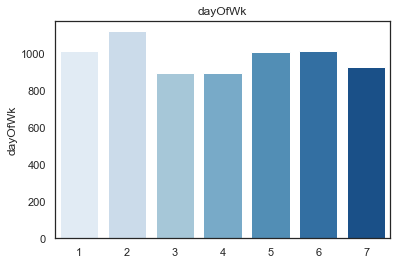

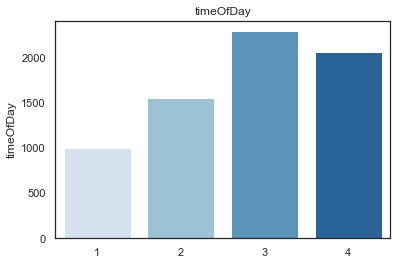

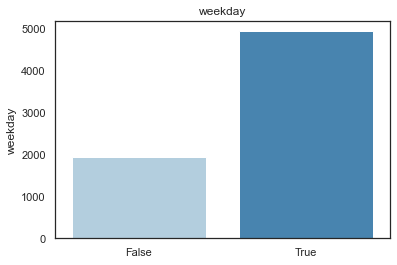

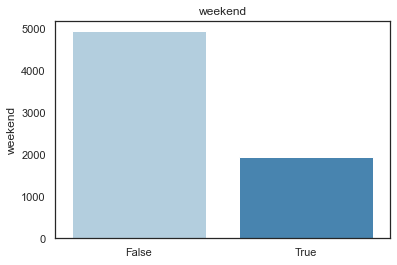

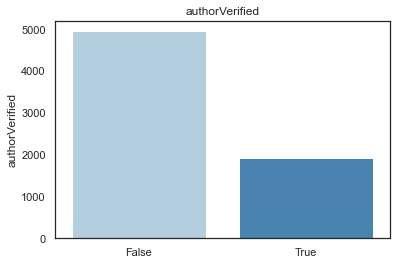

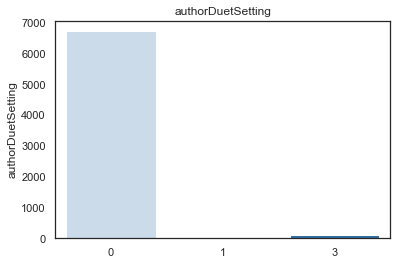

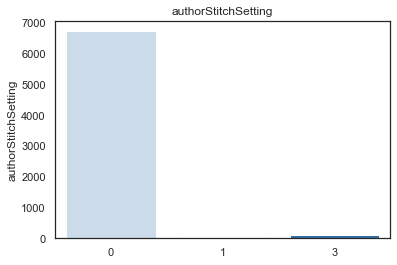

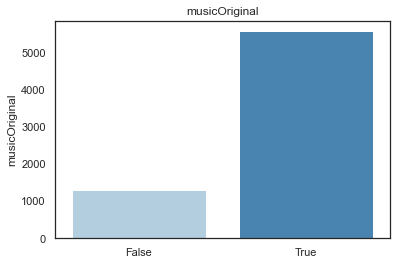

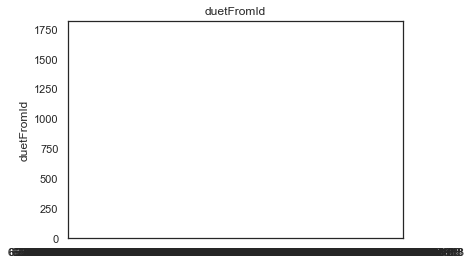

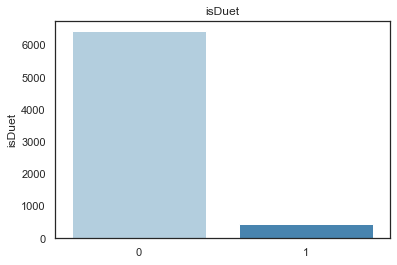

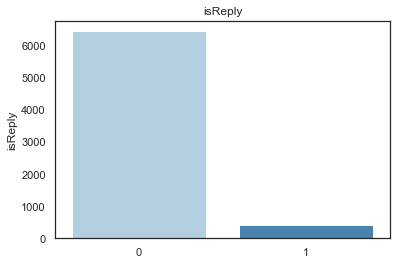

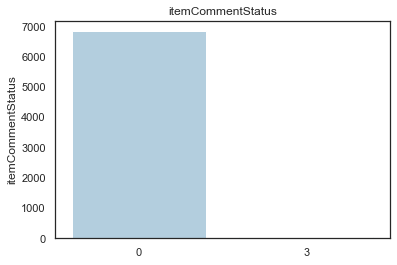

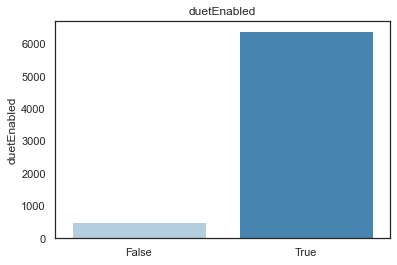

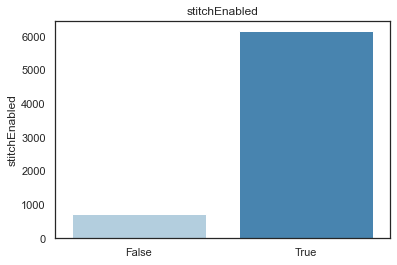

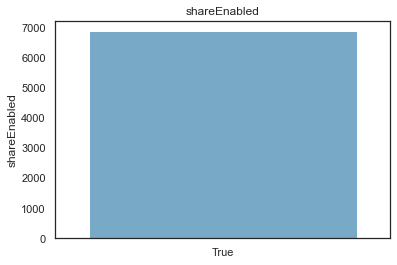

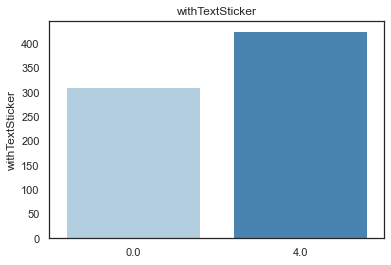

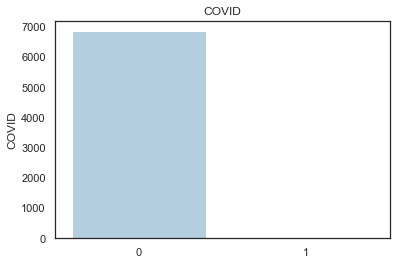

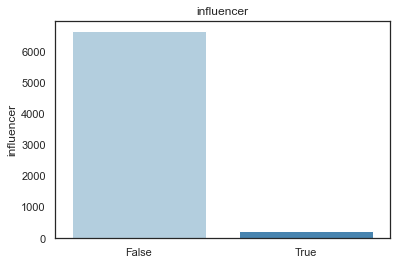

In [36]:
# Generate bar plots for categorical values

for i in df_cat.drop(['id','desc','authorID', 'username', 'nickname', 'musicID', 'musicTitle'], axis=1):
    fig_dims = (6, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts(), ax=ax, palette='Blues').set_title(i)
    plt.show()\

# Data may need to be normalized due to skewness

## Explore Numerical Data

In [37]:
df_num.shape

(6882, 22)

In [38]:
df_num.describe()

,descLength,countTaggedUsers,height,width,duration,ratio,challengeCount,vidHeartCount,vidShareCount,vidCommentCount,vidPlayCount,hashtagCount,authFollowingCount,authFollowerCount,authHeartCount,authVidCount,authDiggCount,textStickerLength,effectStickerCount,erViews
count,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6882.000000,6.882000e+03,6.882000e+03,6882.000000,6.882000e+03,6882.000000,6882.000000,6.882000e+03,6.882000e+03,6882.000000,6882.000000,738.000000,6882.000000,6882.000000
mean,69.987358,0.369805,951.405987,575.044754,25.938390,714.577158,2.943185,3.527758e+05,3.593316e+03,4616.801075,2.941099e+06,3.426184,856.733362,4.026812e+06,9.385983e+07,746.845684,11648.468178,53.161247,0.115519,0.126523
std,43.039060,0.669671,133.218727,86.906589,22.328042,35.580635,2.990631,1.126497e+06,2.482522e+04,19015.737314,9.121590e+06,3.131915,1924.855394,9.512295e+06,2.149518e+08,1007.090007,19832.464966,122.359314,0.340794,0.060778
min,0.000000,0.000000,368.000000,224.000000,5.000000,360.000000,0.000000,5.000000e+00,0.000000e+00,0.000000,4.800000e+02,0.000000,0.000000,2.300000e+01,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.005181
25%,37.000000,0.000000,960.000000,540.000000,13.000000,720.000000,0.000000,1.980000e+04,6.325000e+01,202.000000,1.918000e+05,1.000000,42.000000,6.052500e+04,4.360500e+05,126.000000,1224.000000,0.000000,0.000000,0.085527
50%,64.000000,0.000000,960.000000,576.000000,18.000000,720.000000,2.000000,9.030000e+04,3.390000e+02,750.000000,7.493500e+05,3.000000,165.000000,3.959500e+05,3.400000e+06,350.000000,3967.000000,16.500000,0.000000,0.119792
75%,100.000000,1.000000,1024.000000,576.000000,32.000000,720.000000,4.000000,2.874500e+05,1.487250e+03,2654.750000,2.400000e+06,5.000000,563.000000,2.500000e+06,3.330000e+07,973.000000,13100.000000,47.750000,0.000000,0.159135
max,255.000000,9.000000,1280.000000,1280.000000,180.000000,720.000000,20.000000,2.720000e+07,1.500000e+06,594100.000000,2.781000e+08,20.000000,10000.000000,9.900000e+07,1.600000e+09,20600.000000,377000.000000,1130.000000,6.000000,0.899637


In [39]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   descLength          6882 non-null   int64         
 1   countTaggedUsers    6882 non-null   int64         
 2   createTimePHT       6882 non-null   datetime64[ns]
 3   dateScrapedPHT      6882 non-null   datetime64[ns]
 4   height              6882 non-null   int64         
 5   width               6882 non-null   int64         
 6   duration            6882 non-null   int64         
 7   ratio               6882 non-null   int64         
 8   challengeCount      6882 non-null   int64         
 9   vidHeartCount       6882 non-null   int64         
 10  vidShareCount       6882 non-null   int64         
 11  vidCommentCount     6882 non-null   int64         
 12  vidPlayCount        6882 non-null   int64         
 13  hashtagCount        6882 non-null   int64       

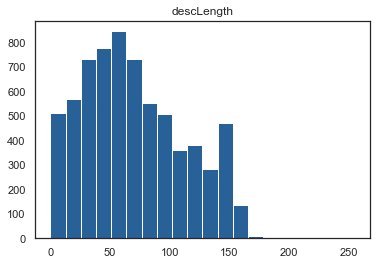

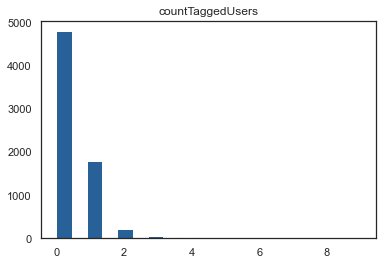

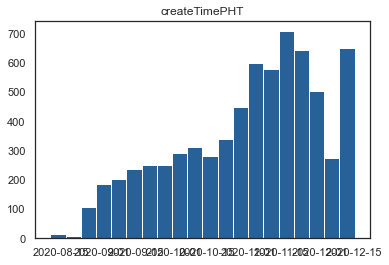

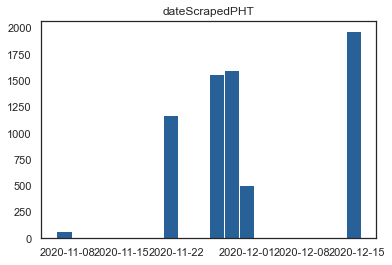

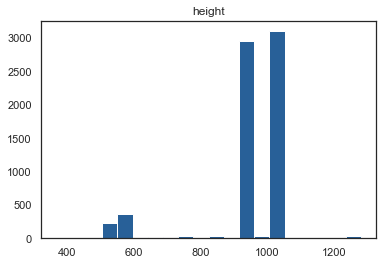

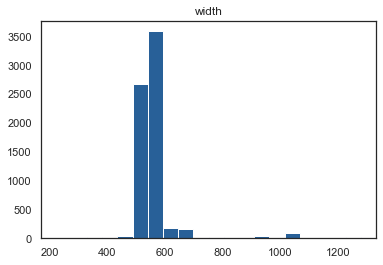

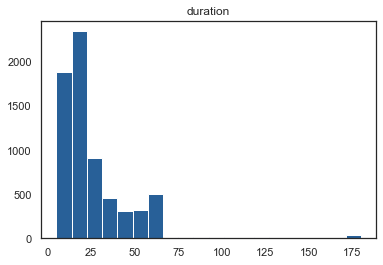

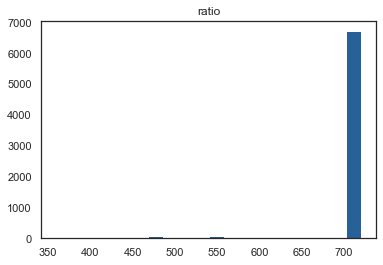

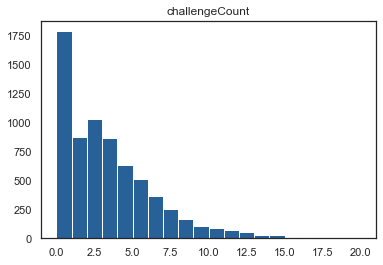

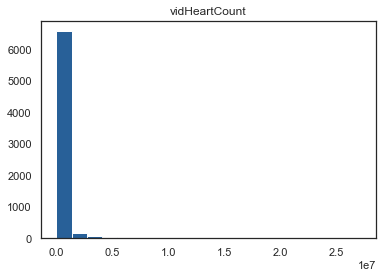

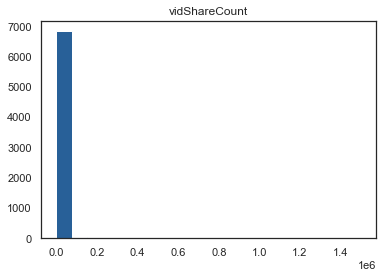

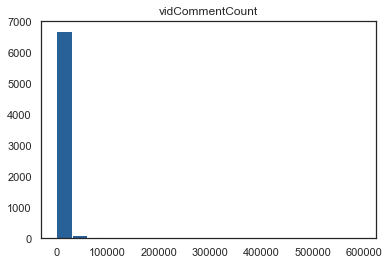

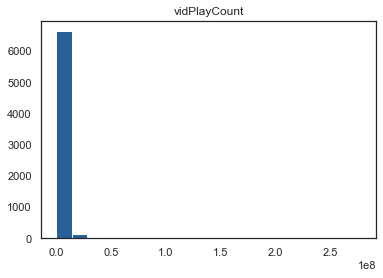

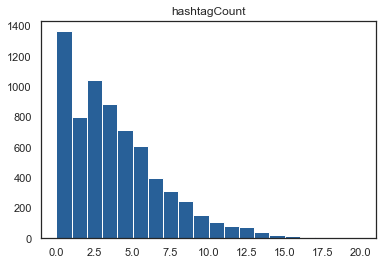

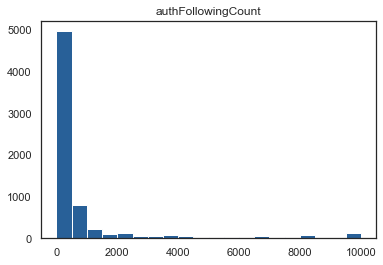

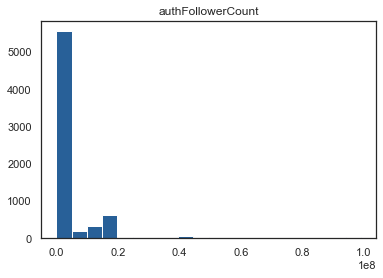

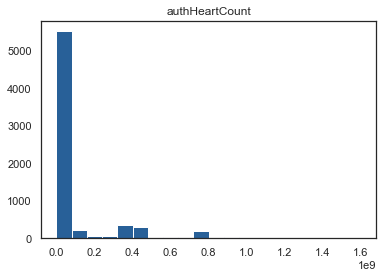

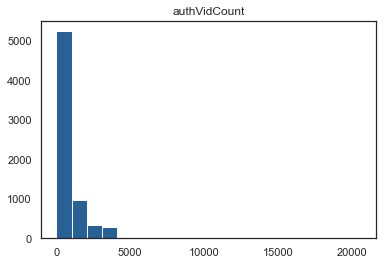

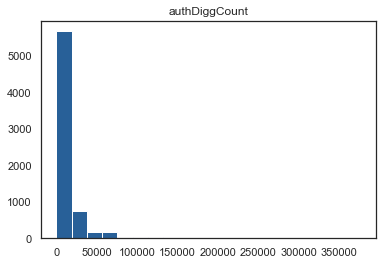

/Users/josephlaurel/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/josephlaurel/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


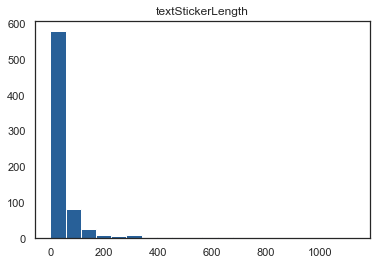

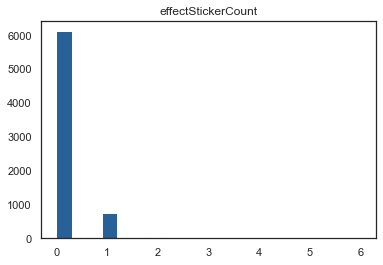

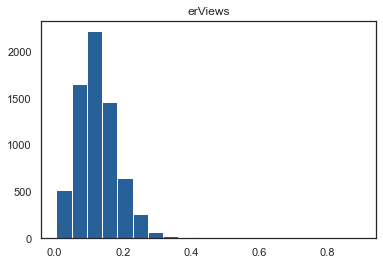

In [40]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.figure(figsize=(6,4)) 
    plt.hist(df_num[i], bins=20, color='#286098')
    plt.title(i)
    plt.show()

#need to normalize data since values of most features are skewed

In [41]:
# Compute the pairwise correlation between numeric variables
df_num.corr()

,descLength,countTaggedUsers,height,width,duration,ratio,challengeCount,vidHeartCount,vidShareCount,vidCommentCount,vidPlayCount,hashtagCount,authFollowingCount,authFollowerCount,authHeartCount,authVidCount,authDiggCount,textStickerLength,effectStickerCount,erViews
descLength,1.000000,0.198423,-0.043371,0.046790,0.162498,0.003628,0.688676,-0.071647,-0.027805,-0.048523,-0.062932,0.731374,0.036885,-0.142868,-0.138986,-0.107911,0.008714,0.018809,-0.002179,0.031703
countTaggedUsers,0.198423,1.000000,-0.125772,0.003529,-0.034331,-0.016827,-0.057646,0.032324,0.009029,0.042232,0.017956,0.139716,0.024698,0.054436,0.060698,0.055905,-0.011627,-0.162545,-0.021011,0.044292
height,-0.043371,-0.125772,1.000000,-0.509751,-0.033963,0.207209,-0.051307,0.060440,0.031161,0.039963,0.065512,-0.074056,-0.044322,0.127372,0.129921,0.070829,0.026042,0.055081,0.033778,0.050601
width,0.046790,0.003529,-0.509751,1.000000,0.032457,0.128485,0.089440,-0.009964,0.001640,-0.004561,-0.009111,0.087125,0.047257,-0.022188,-0.045871,-0.052153,-0.022686,-0.061784,-0.054881,-0.054469
duration,0.162498,-0.034331,-0.033963,0.032457,1.000000,-0.010650,0.129529,-0.040607,-0.021481,-0.030062,-0.043980,0.115618,0.100832,-0.137093,-0.147323,-0.063262,0.033526,0.077133,-0.035142,0.041864
ratio,0.003628,-0.016827,0.207209,0.128485,-0.010650,1.000000,0.019393,-0.002151,0.000291,0.007676,0.003683,0.017065,-0.018141,-0.012422,-0.035705,0.001790,-0.005759,0.029407,0.005647,0.006125
challengeCount,0.688676,-0.057646,-0.051307,0.089440,0.129529,0.019393,1.000000,-0.093004,-0.019239,-0.067008,-0.077423,0.969890,0.003391,-0.188048,-0.196677,-0.179230,-0.043388,-0.042144,0.009007,0.023540
vidHeartCount,-0.071647,0.032324,0.060440,-0.009964,-0.040607,-0.002151,-0.093004,1.000000,0.595681,0.763261,0.919763,-0.095828,-0.027938,0.561234,0.251189,0.005485,-0.022797,-0.017503,-0.030905,0.081205
vidShareCount,-0.027805,0.009029,0.031161,0.001640,-0.021481,0.000291,-0.019239,0.595681,1.000000,0.617857,0.661355,-0.022881,-0.011812,0.236028,0.042717,-0.015022,-0.033009,0.022992,-0.021090,0.027949
vidCommentCount,-0.048523,0.042232,0.039963,-0.004561,-0.030062,0.007676,-0.067008,0.763261,0.617857,1.000000,0.712123,-0.065749,-0.010217,0.430489,0.128972,-0.021705,-0.037444,-0.033684,-0.000246,0.099683


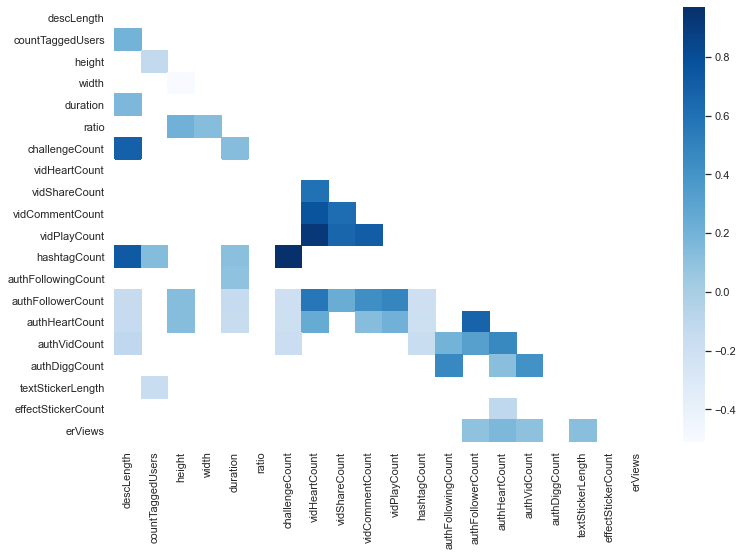

In [42]:
# Plot the heatmap showing the pairwise correlation between numeric variables
# Show only pairs with significant positive or negative correlation (excluding self correlation)

numCorr = df_num.corr()

mask = np.zeros_like(numCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

kot = numCorr[((numCorr > .10) | (numCorr < -.10)) & (numCorr !=1.000) & (numCorr !=-1.000)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, mask=mask, cmap='Blues')

In [44]:
# List highly correlated features

rankNumCorr = df_num.corr()

# set equality (self correlation) as zero
rankNumCorr[rankNumCorr == 1] = 0

# of each feature, find the max correlation and sort the resulting array in ascending order
num_corr_cols  = rankNumCorr.unstack()

# display the highly correlated features
display(num_corr_cols[((num_corr_cols > .5) | (num_corr_cols < -.5)) & (num_corr_cols !=1.000)])

descLength         challengeCount       0.688676
                   hashtagCount         0.731374
height             width               -0.509751
width              height              -0.509751
challengeCount     descLength           0.688676
                   hashtagCount         0.969890
vidHeartCount      vidShareCount        0.595681
                   vidCommentCount      0.763261
                   vidPlayCount         0.919763
                   authFollowerCount    0.561234
vidShareCount      vidHeartCount        0.595681
                   vidCommentCount      0.617857
                   vidPlayCount         0.661355
vidCommentCount    vidHeartCount        0.763261
                   vidShareCount        0.617857
                   vidPlayCount         0.712123
vidPlayCount       vidHeartCount        0.919763
                   vidShareCount        0.661355
                   vidCommentCount      0.712123
hashtagCount       descLength           0.731374
                   c

## Explore Correlation between All Features

In [45]:
data_temp.corr()

,descLength,countTaggedUsers,timeGapDays,dayOfWk,timeOfDay,weekday,weekend,height,width,duration,...,authVidCount,authDiggCount,duetEnabled,stitchEnabled,shareEnabled,withTextSticker,textStickerLength,effectStickerCount,erViews,influencer
descLength,1.000000,0.198423,-0.020373,0.005715,0.038418,-0.006087,0.006087,-0.043371,0.046790,0.162498,...,-0.107911,0.008714,-0.005275,-0.030620,NaN,-0.048007,0.018809,-0.002179,0.031703,0.062362
countTaggedUsers,0.198423,1.000000,-0.074513,0.005472,-0.035903,0.001703,-0.001703,-0.125772,0.003529,-0.034331,...,0.055905,-0.011627,0.046812,0.036863,NaN,-0.320267,-0.162545,-0.021011,0.044292,-0.011183
timeGapDays,-0.020373,-0.074513,1.000000,0.015218,-0.112246,0.025183,-0.025183,0.086443,0.011215,-0.035342,...,0.123432,0.040397,0.036765,0.096892,NaN,-0.068537,-0.079954,-0.034656,-0.073085,-0.017165
dayOfWk,0.005715,0.005472,0.015218,1.000000,-0.006010,0.024983,-0.024983,0.010661,-0.005654,-0.008948,...,-0.000997,-0.008602,0.001063,0.002469,NaN,0.006796,0.000159,-0.002213,0.011963,0.010708
timeOfDay,0.038418,-0.035903,-0.112246,-0.006010,1.000000,0.000813,-0.000813,-0.046823,-0.021465,0.065933,...,-0.191256,-0.125807,-0.007881,-0.007362,NaN,0.057331,-0.029090,0.010046,-0.099293,-0.044458
weekday,-0.006087,0.001703,0.025183,0.024983,0.000813,1.000000,-1.000000,0.012126,-0.009272,-0.016247,...,0.011683,0.011025,0.013167,0.002896,NaN,-0.075928,-0.087403,0.018428,0.006861,0.000568
weekend,0.006087,-0.001703,-0.025183,-0.024983,-0.000813,-1.000000,1.000000,-0.012126,0.009272,0.016247,...,-0.011683,-0.011025,-0.013167,-0.002896,NaN,0.075928,0.087403,-0.018428,-0.006861,-0.000568
height,-0.043371,-0.125772,0.086443,0.010661,-0.046823,0.012126,-0.012126,1.000000,-0.509751,-0.033963,...,0.070829,0.026042,-0.005855,0.003470,NaN,0.183846,0.055081,0.033778,0.050601,0.031030
width,0.046790,0.003529,0.011215,-0.005654,-0.021465,-0.009272,0.009272,-0.509751,1.000000,0.032457,...,-0.052153,-0.022686,-0.003873,-0.017157,NaN,-0.081230,-0.061784,-0.054881,-0.054469,-0.023320
duration,0.162498,-0.034331,-0.035342,-0.008948,0.065933,-0.016247,0.016247,-0.033963,0.032457,1.000000,...,-0.063262,0.033526,-0.321636,-0.198622,NaN,0.071283,0.077133,-0.035142,0.041864,0.004272


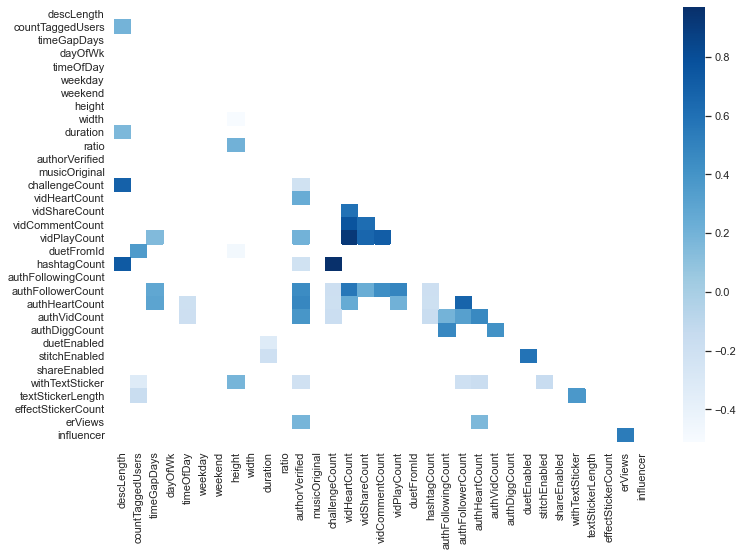

In [46]:
corr_filled = data_temp.corr()

mask = np.zeros_like(corr_filled, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap2 = corr_filled[((corr_filled > .15) | (corr_filled < -.15)) & (corr_filled !=1.000) & (corr_filled !=-1.000)]
plt.figure(figsize=(12,8))
sns.heatmap(heatmap2, mask=mask, cmap='Blues')

# Check whether features with a significant number of missing values have a significant correlation with erViews or influencer
  # textStickerLength - none, can drop
  # withTextSticker - none, can drop
  # duetFromId - none, can drop

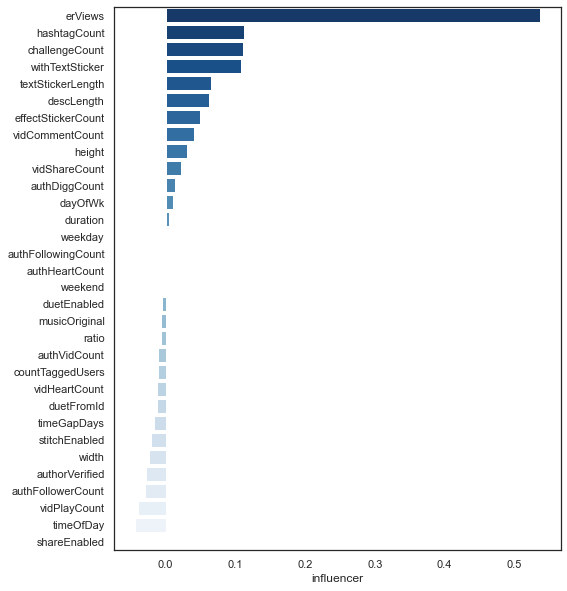

In [47]:
# Feature sorted by correlation to erViews, from positive to negative
corr = corr_filled.sort_values('influencer', ascending=False)

plt.figure(figsize=(8,10))

sns.barplot(corr.influencer[1:], corr.index[1:], orient='h', palette='Blues_r')

plt.show()

/Users/josephlaurel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/josephlaurel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


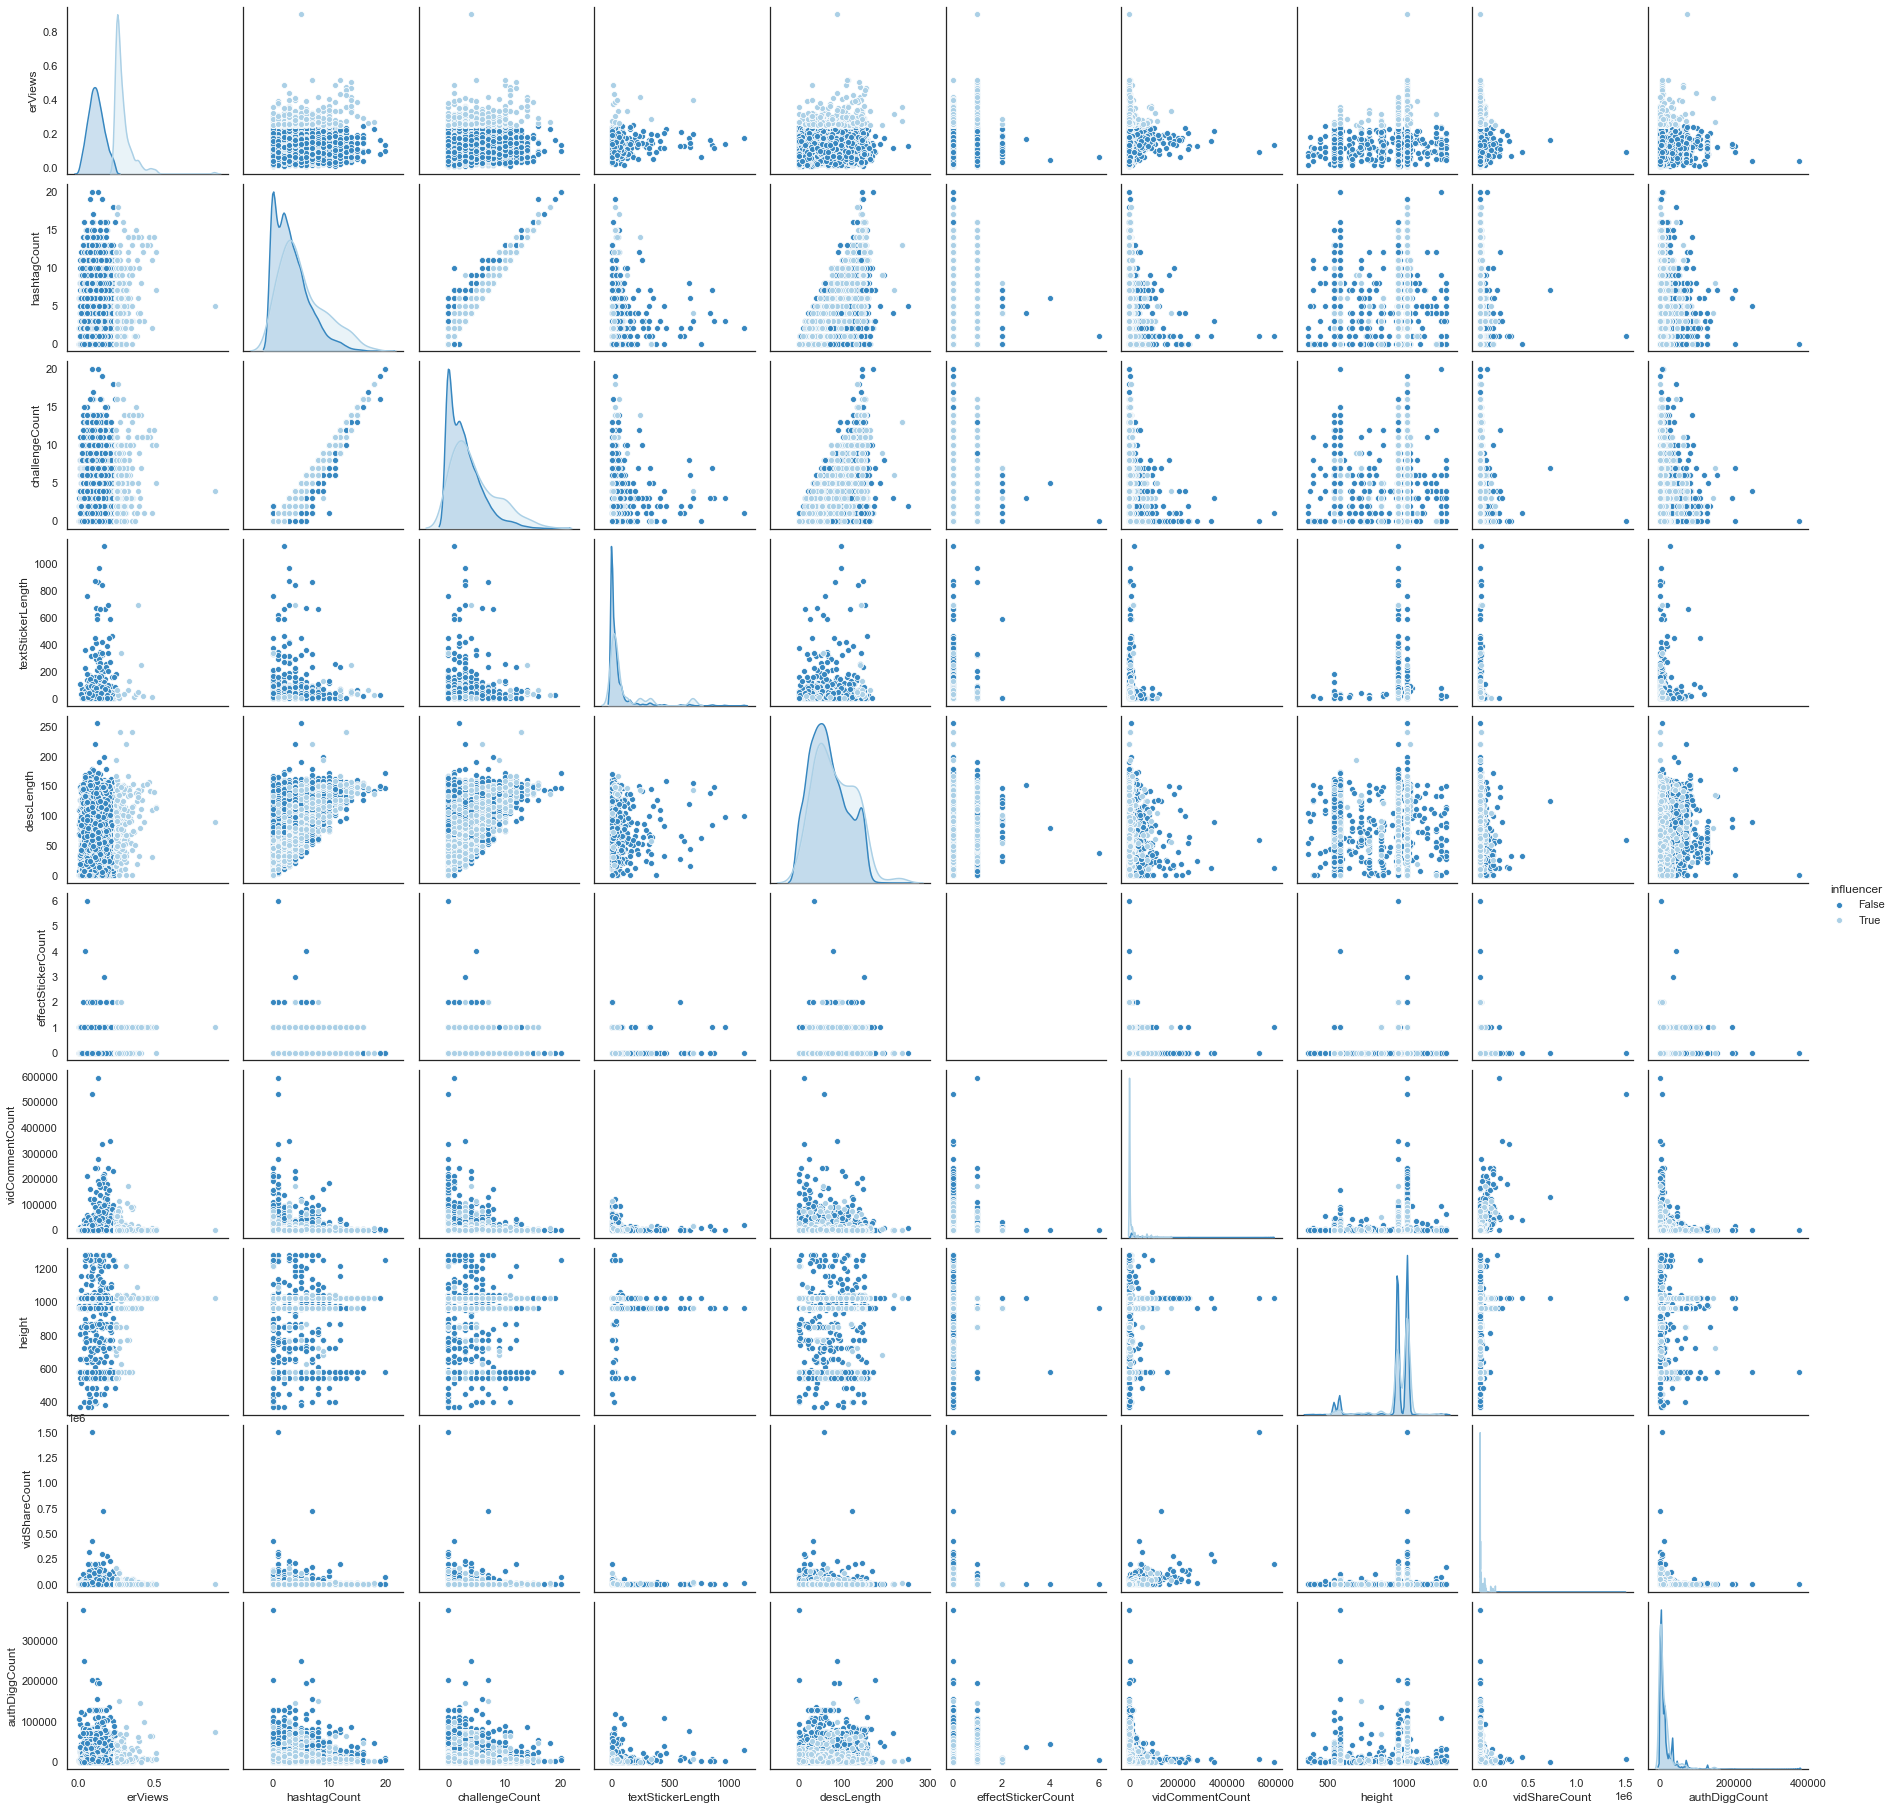

In [48]:
# Create a pairplot of the top features that are positively correlated with 'influencer'
df_pair = data_temp[['influencer', 'erViews','hashtagCount','challengeCount','textStickerLength','descLength','effectStickerCount','vidCommentCount','height','vidShareCount','authDiggCount']]

sns.pairplot(df_pair, hue='influencer', palette='Blues_r')

# Since the pairplots do not show linear separability between classes, we will not perform classification using logistic regression

# **Feature Engineering**

<p align="justify">

The following features were engineered using Microsoft Excel: <i>descLength, countTaggedUsers, timeGapDays, dayOfWk, timeOfDay, weekday, weekend, challengeCount, isDuet, isReply, hashtagCount, textStickerLength, withTextSticker, and erViews.</i>

Based on the above EDA, the time and date-related features such as <i>timeOfDay</i> were correlated with the target variable <i>influencer</i>. To further analyze the effect of a video's creation time and date on influencer classification, additional features were created to account for the month, week, day of the month, hour and minute that a video was created.
</p>

In [ ]:
data['create_month'] = data['createTimePHT'].dt.month
data['create_week'] = data['createTimePHT'].dt.week # on hosted runtime, the attribute would be ".dt.isocalendar().week"
data['create_dayOfMonth'] = data['createTimePHT'].dt.day
data['create_hour'] = data['createTimePHT'].dt.hour
data['create_minute'] = data['createTimePHT'].dt.minute

In [ ]:
data.head()

,id,desc,descLength,countTaggedUsers,createTimePHT,dateScrapedPHT,timeGapDays,dayOfWk,timeOfDay,weekday,...,textStickerLength,effectStickerCount,COVID,erViews,influencer,create_month,create_week,create_dayOfMonth,create_hour,create_minute
0,6904900000000000000,#zeiryl #skustaclee #zeinabharake #fyp #foryou...,66,0,2020-12-11 15:46:12,2020-12-15 12:59:00,3.883889,6,3,True,...,58.0,0,0,0.137810,False,12,50,11,15,46
1,6883800000000000000,üêïüêïüêïüáµüá≠#MateBook14Challenge #fory...,89,0,2020-10-15 22:10:25,2020-12-15 12:59:00,60.617072,5,4,True,...,NaN,0,0,0.121660,False,10,42,15,22,10
2,6873300000000000000,"isa pa ito, nakita ko din kagabi sa fb#fyp #5G...",79,0,2020-09-17 08:42:14,2020-12-15 12:59:00,89.178310,5,2,True,...,NaN,0,0,0.066385,False,9,38,17,8,42
3,6873200000000000000,nakita ko kagabi sa fb#fyp #5GForMe #nnej031520,47,0,2020-09-17 07:50:27,2020-12-15 12:59:00,89.214271,5,2,True,...,NaN,0,0,0.089678,False,9,38,17,7,50
4,6904800000000000000,Reply to @wizardgang94 ayan napo idolüòç this...,143,1,2020-12-11 11:48:57,2020-12-15 12:59:00,4.048646,6,2,True,...,19.0,0,0,0.155515,False,12,50,11,11,48


# **Data Preprocessing for Model**

<p align = "justify"> 
The data was labeled using Microsoft Excel. Each video was classified as influencer or non-influencer generated based on the metric engagement rate by views (erViews), which was computed as follows: 
</p>

<p align = "center"> 
erViews = (vidHeartCount + vidShareCount + vidCommentCount) / vidPlayCount
</p>

<br>
<p align = "justify"> 
The influencer erViews worldwide mean of 15.86% was obtained from Statista <i>("Engagement rate with TikTok influencer content selected countries as of July 2020", 2020)</i>. 
</p>

<br>
<p align = "justify"> 
Videos that had erViews greater than or equal to the worldwide mean were labeled as influencer-generated while videos that scored below the benchmark were classified as non-influencer generated.
</p>

In [ ]:
# Drop features with significant missing values, insignificant correlation with erViews or influencer, or uniform values for all data points
# weekday was dropped to prevent multicollinearity with weekend
# timeOfDay was dropped to prevent multicollinearity with create_hour and create_minute

data.drop(labels = ['weekday','textStickerLength', 'withTextSticker', 'duetFromId', 'shareEnabled', 'timeOfDay'], axis =1,  inplace = True )

## Handle Outliers

### Univariate Analysis

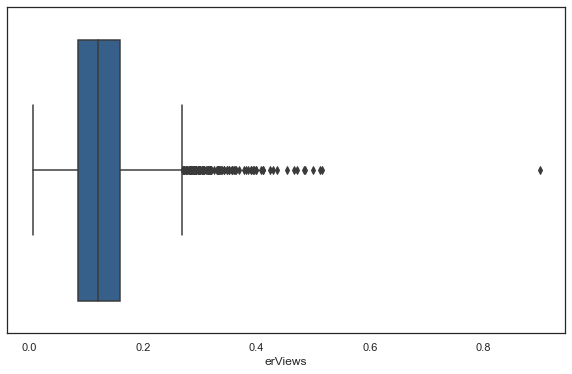

In [ ]:
# Generate boxplot for erViews to check for outliers
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data.erViews, orient='h', ax=ax, color='#286098')

In [ ]:
# Remove outliers based on the interquartile range (IQR) score

Q1 = np.quantile(data.erViews,0.25)

Q3 = np.quantile(data.erViews,0.75)

IQR = Q3 - Q1

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("Lower Limit: %.2f" % lower_limit)
print("Upper Limit: %.2f" % upper_limit)

Lower Limit: -0.02
Upper Limit: 0.27


In [ ]:
 # View data within the IQR
within_IQR = data[(data.erViews < lower_limit) | (data.erViews > upper_limit)]
within_IQR.count()

id                     135
desc                   133
descLength             135
countTaggedUsers       135
createTimePHT          135
dateScrapedPHT         135
timeGapDays            135
dayOfWk                135
weekend                135
height                 135
width                  135
duration               135
ratio                  135
authorID               135
username               135
nickname               135
authorVerified         135
authorDuetSetting      135
authorStitchSetting    135
musicID                135
musicTitle             135
musicOriginal          135
challengeCount         135
vidHeartCount          135
vidShareCount          135
vidCommentCount        135
vidPlayCount           135
isDuet                 135
isReply                135
hashtagCount           135
itemCommentStatus      135
authFollowing Count    135
authFollowerCount      135
authHeartCount         135
authVidCount           135
authDiggCount          135
duetEnabled            135
s

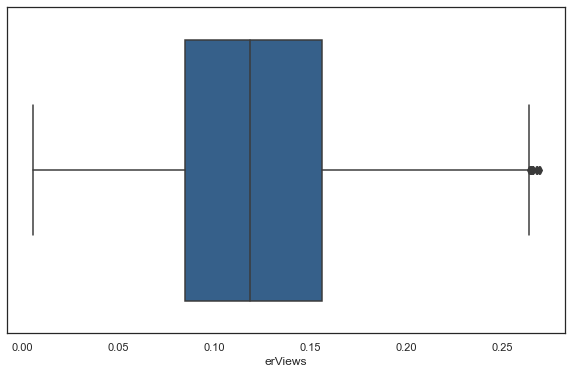

In [ ]:
# View data with outliers removed
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

df_IQR = data[(data.erViews > lower_limit) & (data.erViews < upper_limit)]

sns.boxplot(df_IQR.erViews, orient='h', ax=ax, color='#286098')

# Since only a small number of data points lie within the IQR, we won't remove outliers based on this method

### Bivariate Analysis 

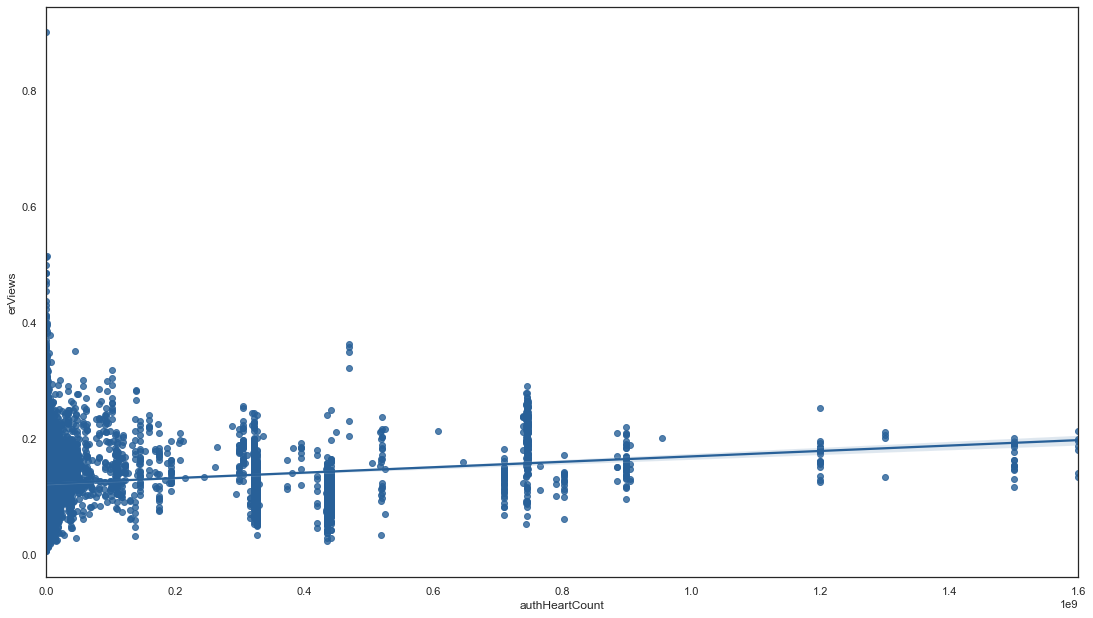

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(data = data, x = 'authHeartCount', y = 'erViews', ax = ax, color='#286098')

In [ ]:
# Remove outlier in the upper left corner

data = data.drop(data[(data.erViews > 0.6)].index)

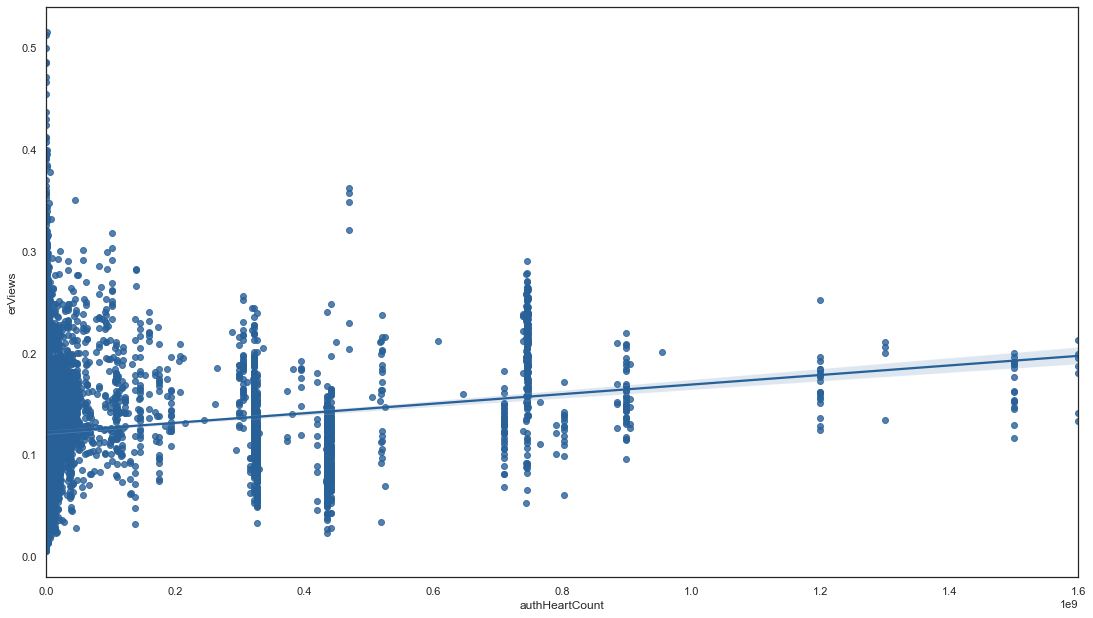

In [ ]:
# View regression plot without outlier

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(data = data, x = 'authHeartCount', y = 'erViews', ax = ax, color='#286098')

# Range of error seems largely unaffected after the outlier was dropped

## Convert Categorical Variables to Numeric Variables

In [ ]:
df_cat.head()

,id,desc,dayOfWk,timeOfDay,weekday,weekend,authorID,username,nickname,authorVerified,...,duetFromId,isDuet,isReply,itemCommentStatus,duetEnabled,stitchEnabled,shareEnabled,withTextSticker,COVID,influencer
0,6904900000000000000,#zeiryl #skustaclee #zeinabharake #fyp #foryou...,6,3,True,False,80130343239,chayieeeeeeeeee,Chayieeeüî•,False,...,0.0,0,0,0,True,True,True,4.0,0,False
1,6883800000000000000,üêïüêïüêïüáµüá≠#MateBook14Challenge #fory...,5,4,True,False,6810935918968734721,rmde1,Tpt_deliviosrmüáµüá≠,False,...,0.0,0,0,0,False,False,True,NaN,0,False
2,6873300000000000000,"isa pa ito, nakita ko din kagabi sa fb#fyp #5G...",5,2,True,False,6806556329449964546,nnej031520,Jenn Moreto,False,...,0.0,0,0,0,False,False,True,NaN,0,False
3,6873200000000000000,nakita ko kagabi sa fb#fyp #5GForMe #nnej031520,5,2,True,False,6806556329449964546,nnej031520,Jenn Moreto,False,...,0.0,0,0,0,False,False,True,NaN,0,False
4,6904800000000000000,Reply to @wizardgang94 ayan napo idolüòç this...,6,2,True,False,6751584992079791105,senpai.jr07,sEnPai.jr07 üîò,False,...,0.0,0,1,0,False,False,True,4.0,0,False


In [ ]:
# Create a subset of the data for nominal categories
nominal = pd.DataFrame(data=data[['weekend', 'authorVerified', 'musicOriginal', 'duetEnabled', 'stitchEnabled']])
nominal.head()

,weekend,authorVerified,musicOriginal,duetEnabled,stitchEnabled
0,False,False,True,True,True
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [ ]:
nominal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6881 entries, 0 to 6881
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   weekend         6881 non-null   bool 
 1   authorVerified  6881 non-null   bool 
 2   musicOriginal   6881 non-null   bool 
 3   duetEnabled     6881 non-null   bool 
 4   stitchEnabled   6881 non-null   bool 
dtypes: bool(5)
memory usage: 87.4 KB


In [ ]:
ohe_weekend = pd.get_dummies(nominal.weekend, prefix='weekend')
ohe_weekend.head()

,weekend_False,weekend_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
ohe_authorVerified = pd.get_dummies(nominal.authorVerified, prefix='authorVerified')
ohe_authorVerified.head()

,authorVerified_False,authorVerified_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
ohe_musicOriginal = pd.get_dummies(nominal.musicOriginal, prefix='musicOriginal')
ohe_musicOriginal.head()

,musicOriginal_False,musicOriginal_True
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
ohe_duetEnabled = pd.get_dummies(nominal.duetEnabled, prefix='duetEnabled')
ohe_duetEnabled.head()

,duetEnabled_False,duetEnabled_True
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
ohe_stitchEnabled = pd.get_dummies(nominal.stitchEnabled, prefix='stitchEnabled')
ohe_stitchEnabled.head()

,stitchEnabled_False,stitchEnabled_True
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df_ohe = pd.concat([data, ohe_weekend, ohe_authorVerified, ohe_musicOriginal, ohe_duetEnabled, ohe_stitchEnabled], axis='columns')
df_ohe.head()

,id,desc,descLength,countTaggedUsers,createTimePHT,dateScrapedPHT,timeGapDays,dayOfWk,weekend,height,...,weekend_False,weekend_True,authorVerified_False,authorVerified_True,musicOriginal_False,musicOriginal_True,duetEnabled_False,duetEnabled_True,stitchEnabled_False,stitchEnabled_True
0,6904900000000000000,#zeiryl #skustaclee #zeinabharake #fyp #foryou...,66,0,2020-12-11 15:46:12,2020-12-15 12:59:00,3.883889,6,False,960,...,1,0,1,0,0,1,0,1,0,1
1,6883800000000000000,üêïüêïüêïüáµüá≠#MateBook14Challenge #fory...,89,0,2020-10-15 22:10:25,2020-12-15 12:59:00,60.617072,5,False,576,...,1,0,1,0,0,1,1,0,1,0
2,6873300000000000000,"isa pa ito, nakita ko din kagabi sa fb#fyp #5G...",79,0,2020-09-17 08:42:14,2020-12-15 12:59:00,89.178310,5,False,1024,...,1,0,1,0,0,1,1,0,1,0
3,6873200000000000000,nakita ko kagabi sa fb#fyp #5GForMe #nnej031520,47,0,2020-09-17 07:50:27,2020-12-15 12:59:00,89.214271,5,False,1024,...,1,0,1,0,0,1,1,0,1,0
4,6904800000000000000,Reply to @wizardgang94 ayan napo idolüòç this...,143,1,2020-12-11 11:48:57,2020-12-15 12:59:00,4.048646,6,False,1024,...,1,0,1,0,0,1,1,0,1,0


In [ ]:
df_ohe = df_ohe.drop(columns=['weekend', 'authorVerified', 'musicOriginal', 'duetEnabled', 'stitchEnabled', 'weekend_False', 'authorVerified_False', 'musicOriginal_False', 'duetEnabled_False', 'stitchEnabled_False','id', 'musicID', 'authorID', 'desc', 'username', 'nickname', 'musicTitle', 'createTimePHT', 'dateScrapedPHT'])
df_ohe.head()

,descLength,countTaggedUsers,timeGapDays,dayOfWk,height,width,duration,ratio,authorDuetSetting,authorStitchSetting,...,create_month,create_week,create_dayOfMonth,create_hour,create_minute,weekend_True,authorVerified_True,musicOriginal_True,duetEnabled_True,stitchEnabled_True
0,66,0,3.883889,6,960,540,180,720,0,0,...,12,50,11,15,46,0,0,1,1,1
1,89,0,60.617072,5,576,576,180,720,0,0,...,10,42,15,22,10,0,0,1,0,0
2,79,0,89.178310,5,1024,576,180,720,0,0,...,9,38,17,8,42,0,0,1,0,0
3,47,0,89.214271,5,1024,576,180,720,0,0,...,9,38,17,7,50,0,0,1,0,0
4,143,1,4.048646,6,1024,576,180,720,0,0,...,12,50,11,11,48,0,0,1,0,0


In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6881 entries, 0 to 6881
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   descLength           6881 non-null   int64   
 1   countTaggedUsers     6881 non-null   int64   
 2   timeGapDays          6881 non-null   float64 
 3   dayOfWk              6881 non-null   int64   
 4   height               6881 non-null   int64   
 5   width                6881 non-null   int64   
 6   duration             6881 non-null   int64   
 7   ratio                6881 non-null   int64   
 8   authorDuetSetting    6881 non-null   category
 9   authorStitchSetting  6881 non-null   category
 10  challengeCount       6881 non-null   int64   
 11  vidHeartCount        6881 non-null   int64   
 12  vidShareCount        6881 non-null   int64   
 13  vidCommentCount      6881 non-null   int64   
 14  vidPlayCount         6881 non-null   int64   
 15  isDuet               

#<b> Model Building

## Splitting the Dataset

In [ ]:
import math

In [ ]:
# Compute for train-test split based on method of Guyon (1997)

print('Train-test split:', 1-(1/math.sqrt(len(df_ohe.columns))),'/',(1/math.sqrt(len(df_ohe.columns))))

Train-test split: 0.8377785788692375 / 0.16222142113076254


In [ ]:
#Separate the features and the target variable
x = df_ohe.drop(columns=['influencer'])
y = df_ohe['influencer']

In [ ]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(1/math.sqrt(len(df_ohe.columns))), random_state=42)

In [ ]:
#Check shape to make sure it is all in order
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5764, 37), (1117, 37), (5764,), (1117,))

## Feature Scaling
###### Needed for algorithms where the Euclidean distance or Manhattan distance matters (e.g. K-nearest neighbors, Gradient Descent)

In [ ]:
#Import the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit to the TRAIN set
scaler.fit(x_train)

#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
x_test_s = scaler.transform(x_test)

#Convert to DataFrame for viewing
x_train_sdf = pd.DataFrame(x_train_s, columns=x_train.columns, index=x_train.index)

#Convert to DataFrame for viewing
x_test_sdf = pd.DataFrame(x_test_s, columns=x_test.columns, index=x_test.index)

In [ ]:
# View scaled features
x_train_sdf.head()

,descLength,countTaggedUsers,timeGapDays,dayOfWk,height,width,duration,ratio,authorDuetSetting,authorStitchSetting,...,create_month,create_week,create_dayOfMonth,create_hour,create_minute,weekend_True,authorVerified_True,musicOriginal_True,duetEnabled_True,stitchEnabled_True
5540,0.101961,0.111111,0.220816,0.500000,0.649123,0.299242,0.034286,1.0,0.0,0.0,...,0.75,0.833333,0.800000,0.608696,0.016949,0.0,0.0,1.0,0.0,0.0
6770,0.023529,0.000000,0.509838,0.666667,0.649123,0.299242,0.005714,1.0,0.0,0.0,...,0.50,0.500000,0.466667,0.608696,0.000000,0.0,0.0,1.0,0.0,0.0
6799,0.172549,0.111111,0.368620,0.166667,0.719298,0.333333,0.005714,1.0,0.0,0.0,...,0.50,0.611111,0.833333,0.130435,0.372881,0.0,1.0,1.0,1.0,1.0
3426,0.160784,0.000000,0.360440,0.166667,0.719298,0.333333,0.074286,1.0,0.0,0.0,...,0.50,0.611111,0.833333,0.913043,0.016949,0.0,0.0,1.0,0.0,0.0
3661,0.227451,0.000000,0.782468,1.000000,0.317982,0.333333,0.068571,1.0,0.0,0.0,...,0.25,0.222222,0.366667,0.130435,0.644068,1.0,1.0,1.0,1.0,1.0


In [ ]:
x_train_sdf.describe()

,descLength,countTaggedUsers,timeGapDays,dayOfWk,height,width,duration,ratio,authorDuetSetting,authorStitchSetting,...,create_month,create_week,create_dayOfMonth,create_hour,create_minute,weekend_True,authorVerified_True,musicOriginal_True,duetEnabled_True,stitchEnabled_True
count,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,...,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000,5764.000000
mean,0.274577,0.041021,0.344635,0.491875,0.640245,0.332185,0.118978,0.984386,0.018679,0.018563,...,0.625347,0.628961,0.488035,0.578305,0.483798,0.281575,0.280014,0.807252,0.926440,0.891742
std,0.168899,0.074951,0.289438,0.335577,0.145311,0.082480,0.126491,0.100258,0.128534,0.130634,...,0.251082,0.234158,0.286254,0.273813,0.301050,0.449806,0.449045,0.394491,0.261076,0.310733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145098,0.000000,0.108365,0.166667,0.649123,0.299242,0.045714,1.000000,0.000000,0.000000,...,0.500000,0.444444,0.266667,0.391304,0.220339,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.250980,0.000000,0.249068,0.500000,0.649123,0.333333,0.074286,1.000000,0.000000,0.000000,...,0.750000,0.666667,0.466667,0.608696,0.474576,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.392157,0.111111,0.554631,0.833333,0.719298,0.333333,0.150000,1.000000,0.000000,0.000000,...,0.750000,0.833333,0.733333,0.782609,0.745763,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Resampling using the Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# Import package
from imblearn.over_sampling import SMOTE

# Run this command to install imblearn via Command Prompt/Terminal: pip install imblearn

In [ ]:
# Implement resampling
sm = SMOTE(random_state=42, sampling_strategy=1)
x_res, y_res = sm.fit_sample(x_train_s, y_train)

x_res.shape, y_res.shape

((8658, 37), (8658,))

## K-Nearest Neighbors (KNN)
### Baseline Model with Resampling
#### Training

In [ ]:
#Import the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#Import the datasets and metrics modules
from sklearn import datasets, metrics

In [ ]:
#Set the value of K
k = round(math.sqrt(5764))

#Instatiate the model
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model to the training set
knn.fit(x_res,y_res)

KNeighborsClassifier(n_neighbors=76)

####Model Validation
##### Testing

In [ ]:
#Predict on the Test Set
y_pred_knn = knn.predict(x_test)

##### Performance Metrics

In [ ]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred_knn)))

# 'False' f1-score significantly decreased while 'True' f1-score increased compared to version 1 baseline KNN

Classification report for classifier KNeighborsClassifier(n_neighbors=76):
              precision    recall  f1-score   support

       False       0.99      0.11      0.20       814
        True       0.29      1.00      0.45       303

    accuracy                           0.35      1117
   macro avg       0.64      0.55      0.33      1117
weighted avg       0.80      0.35      0.27      1117




Text(0.5, 39.5, 'Predicted label')

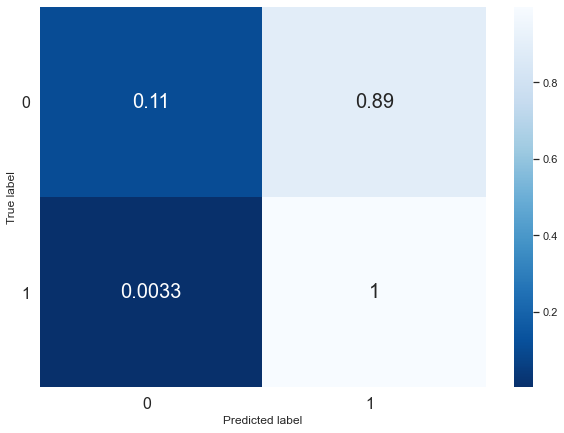

In [ ]:
#Plot the confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn, normalize='true')

labels=[0,1]

df_cm_knn = pd.DataFrame(cm_knn, index=labels, columns=labels)

#Plot attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_knn = sns.heatmap(df_cm_knn,annot=True, annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_knn.yaxis.set_ticklabels(heatmap_knn.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_knn.xaxis.set_ticklabels(heatmap_knn.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Baseline Model without Resampling
#### Training

In [ ]:
#Instatiate the model
knn_nores = KNeighborsClassifier(n_neighbors=k)

#Fit the model to the training set
knn_nores.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=76)

####Model Validation
##### Testing

In [ ]:
#Predict on the Test Set
y_pred_knn_nores = knn_nores.predict(x_test)

##### Performance Metrics

In [ ]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn_nores, metrics.classification_report(y_test, y_pred_knn_nores)))

# No resampling improved the results of KNN

Classification report for classifier KNeighborsClassifier(n_neighbors=76):
              precision    recall  f1-score   support

       False       0.80      0.48      0.60       814
        True       0.33      0.68      0.44       303

    accuracy                           0.54      1117
   macro avg       0.56      0.58      0.52      1117
weighted avg       0.67      0.54      0.56      1117




Text(0.5, 39.5, 'Predicted label')

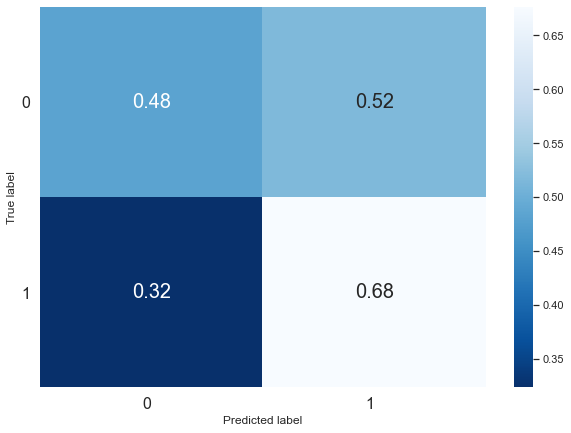

In [ ]:
#Plot the confusion matrix
cm_knn_nores = metrics.confusion_matrix(y_test, y_pred_knn_nores, normalize='true')

labels=[0,1]

df_cm_knn_nores = pd.DataFrame(cm_knn_nores, index=labels, columns=labels)

#Plot attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_knn_nores = sns.heatmap(df_cm_knn_nores,annot=True, annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_knn_nores.yaxis.set_ticklabels(heatmap_knn_nores.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_knn_nores.xaxis.set_ticklabels(heatmap_knn_nores.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Tuned Model without Resampling
Based on code by [Ken Jee](https://www.kaggle.com/kenjee/titanic-project-example) and Krish Naik
<br><br>
#### Hyperparameter Tuning

In [ ]:
# Import the RandomizedSearchCV library
from sklearn.model_selection import RandomizedSearchCV

#knn_tuned = KNeighborsClassifier()
#param_grid_knn = {'n_neighbors' : [40,50,60,70,80,90,100],
#              'weights' : ['uniform', 'distance'],
#              'algorithm' : ['auto', 'ball_tree','kd_tree'],
#              'p' : [1,2]}
#knn_random = RandomizedSearchCV(knn_tuned, param_distributions = param_grid_knn, cv = 10, verbose = 3, n_jobs = -1, random_state=42)

## Fit the random search model
#knn_random.fit(x_train_s, y_train)

## Return best KNN estimator
#knn_random.best_estimator_

#### Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
knn_best = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=60, p=1,
                     weights='distance')

#Fit to the train dataset
knn_best.fit(x_train_s, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=60, p=1,
                     weights='distance')

#### Model Validation
##### Testing

In [ ]:
#Get predictions 

knn_best_test = knn_best.predict(x_test_sdf)

knn_best_test

array([False, False, False, ..., False, False, False])

##### Performance Metrics

In [ ]:
# Import library for accuracy score
from sklearn.metrics import classification_report

print(classification_report(y_test,knn_best_test))

# Hyperparameter optimization for KNN with no resampling improved f1-score for False but worsened f1-score for True
# Version 1 optimized KNN vs current optimized KNN: 'False' f1-score worsened but 'True' f1-score slightly improved

              precision    recall  f1-score   support

       False       0.76      0.99      0.86       814
        True       0.90      0.17      0.29       303

    accuracy                           0.77      1117
   macro avg       0.83      0.58      0.58      1117
weighted avg       0.80      0.77      0.71      1117



Text(0.5, 39.5, 'Predicted label')

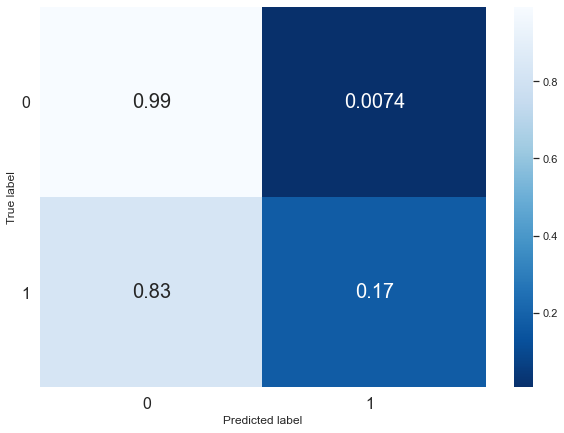

In [ ]:
#Plot the confusion matrix
cm_knn_best = confusion_matrix(y_test, knn_best_test, normalize='true')

df_cm_knn_best = pd.DataFrame(cm_knn_best, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_knn_best = sns.heatmap(df_cm_knn_best,annot=True,annot_kws={"size": 20}, cmap="Blues_r")

#Heatmap attributes
heatmap_knn_best.yaxis.set_ticklabels(heatmap_knn_best.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_knn_best.xaxis.set_ticklabels(heatmap_knn_best.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Compared to baseline KNN, false negative predictions (5) decreased while false positive predictions (164) increased
# Tuned KNN was able to classify 32 videos as influencer-generated while the baseline KNN failed to label any videos as such

## Naive Bayes with Resampled Data
### Training

In [ ]:
# Import library for sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Instantiate the Algorithm 
gnb = GaussianNB()

#Train the model
gnb.fit(x_res,y_res)

GaussianNB()

### Model Validation

####Testing

In [ ]:
#Predict on the Test Set
y_pred_NB = gnb.predict(x_test_sdf)

y_pred_NB

array([ True, False,  True, ..., False,  True,  True])

####Performance Metrics

In [ ]:
print(classification_report(y_test,y_pred_NB))

# Model performance significantly improved in comparison to version 1 NB baseline model

              precision    recall  f1-score   support

       False       0.93      0.61      0.73       814
        True       0.45      0.87      0.59       303

    accuracy                           0.68      1117
   macro avg       0.69      0.74      0.66      1117
weighted avg       0.80      0.68      0.70      1117



Text(0.5, 39.5, 'Predicted label')

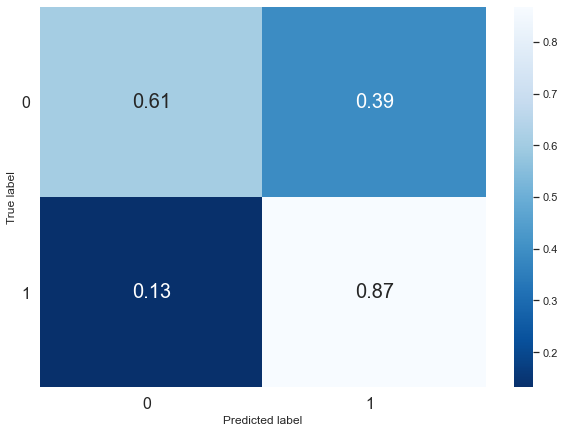

In [ ]:
#Plot the confusion matrix
cm_NB = confusion_matrix(y_test, y_pred_NB, normalize='true')

df_cm_NB = pd.DataFrame(cm_NB, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_NB = sns.heatmap(df_cm_NB,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_NB.yaxis.set_ticklabels(heatmap_NB.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_NB.xaxis.set_ticklabels(heatmap_NB.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Naive Bayes without Resampled Data
### Training

In [ ]:
#Instantiate the Algorithm 
gnb_nores = GaussianNB()

#Train the model
gnb_nores.fit(x_train_s,y_train)

GaussianNB()

### Model Validation

####Testing

In [ ]:
#Predict on the Test Set
y_pred_NB_nores = gnb_nores.predict(x_test_sdf)

y_pred_NB_nores

array([ True, False,  True, ..., False, False,  True])

####Performance Metrics

In [ ]:
print(classification_report(y_test,y_pred_NB_nores))

# No resampling improved the results even more

              precision    recall  f1-score   support

       False       0.93      0.90      0.92       814
        True       0.76      0.82      0.79       303

    accuracy                           0.88      1117
   macro avg       0.84      0.86      0.85      1117
weighted avg       0.88      0.88      0.88      1117



Text(0.5, 39.5, 'Predicted label')

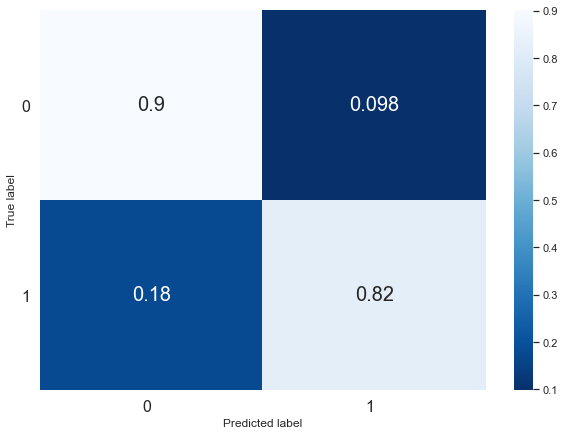

In [ ]:
#Plot the confusion matrix
cm_NB_nores = confusion_matrix(y_test, y_pred_NB_nores, normalize='true')

df_cm_NB_nores = pd.DataFrame(cm_NB_nores, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_NB_nores = sns.heatmap(df_cm_NB_nores,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_NB_nores.yaxis.set_ticklabels(heatmap_NB_nores.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_NB_nores.xaxis.set_ticklabels(heatmap_NB_nores.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Random Forest Baseline Model with Resampled Data
### Training

In [ ]:
# Import library for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate the classifier
rf_baseline = RandomForestClassifier(random_state = 42)

# Fit the model to the training data
rf_baseline.fit(x_res, y_res)

RandomForestClassifier(random_state=42)

### Model Validation
#### Testing

In [ ]:
#Get predictions 

rf_baseline_test = rf_baseline.predict(x_test_sdf)

rf_baseline_test 

array([ True, False,  True, ..., False, False, False])

####Performance Metrics

In [ ]:
print(classification_report(y_test,rf_baseline_test))

# Same results as version 1 RF baseline model

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       814
        True       1.00      1.00      1.00       303

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117



Text(0.5, 39.5, 'Predicted label')

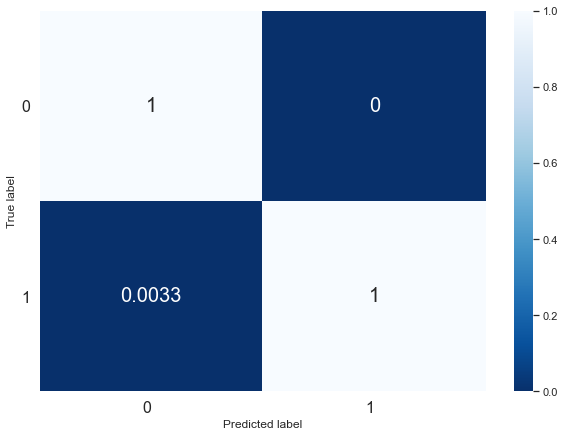

In [ ]:
#Plot the confusion matrix
cm_RF_baseline = confusion_matrix(y_test, rf_baseline_test, normalize='true')

df_cm_RF_baseline = pd.DataFrame(cm_RF_baseline, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_RF = sns.heatmap(df_cm_RF_baseline,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_RF.yaxis.set_ticklabels(heatmap_RF.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_RF.xaxis.set_ticklabels(heatmap_RF.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Compared to version 1, FN occurrence increased by 1

## Random Forest Baseline Model without Resampled Data
### Training

In [ ]:
# Instantiate the classifier
rf_baseline_nores = RandomForestClassifier(random_state = 42)

# Fit the model to the training data
rf_baseline_nores.fit(x_train_s, y_train)

RandomForestClassifier(random_state=42)

### Model Validation
#### Testing

In [ ]:
#Get predictions 

rf_baseline_test_nores = rf_baseline_nores.predict(x_test_sdf)

rf_baseline_test_nores 

array([ True, False,  True, ..., False, False, False])

####Performance Metrics

In [ ]:
print(classification_report(y_test,rf_baseline_test_nores))

# No resampling had no effect on the baseline model

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       814
        True       1.00      1.00      1.00       303

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117



Text(0.5, 39.5, 'Predicted label')

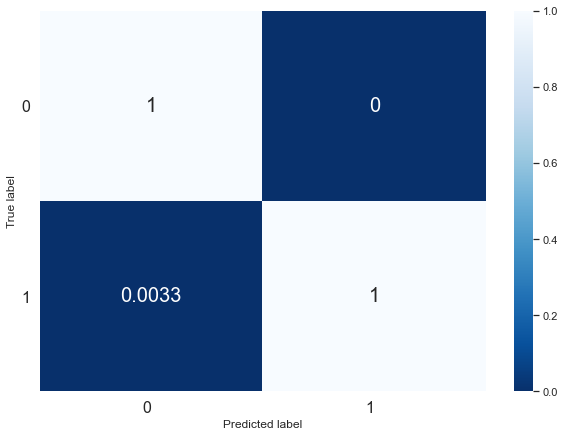

In [ ]:
#Plot the confusion matrix
cm_RF_baseline_nores = confusion_matrix(y_test, rf_baseline_test_nores, normalize='true')

df_cm_RF_baseline_nores = pd.DataFrame(cm_RF_baseline_nores, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_RF_nores = sns.heatmap(df_cm_RF_baseline_nores,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_RF_nores.yaxis.set_ticklabels(heatmap_RF_nores.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_RF_nores.xaxis.set_ticklabels(heatmap_RF_nores.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Tuned Model
#### Hyperparameter Tuning

In [ ]:
## Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

## Number of features to consider at every split
#max_features = ['auto', 'sqrt']

## Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

## Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

## Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

## Method of selecting samples for training each tree
#bootstrap = [True, False]# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
               
#print(random_grid)


In [ ]:
## Use the random grid to search for best hyperparameters

## First create the base model to tune
#rf = RandomForestClassifier()

## Random search of parameters, using 10 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, verbose=3, random_state=42, n_jobs = -1)

## Fit the random search model
#rf_random.fit(x_train_s, y_train)

## Show the Random Forest model with the best parameters
#rf_random.best_estimator_

####Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
rf_best = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=2,
                       n_estimators=52)

#Fit to the train dataset
rf_best.fit(x_train_s,y_train)

RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=2,
                       n_estimators=52)

####Model Validation
##### Testing

In [ ]:
#Get predictions 

rf_test = rf_best.predict(x_test_sdf)

rf_test

array([ True, False,  True, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,rf_test))

# Hyperparameter optimization had no effect on the model results

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       814
        True       1.00      1.00      1.00       303

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117



Text(0.5, 39.5, 'Predicted label')

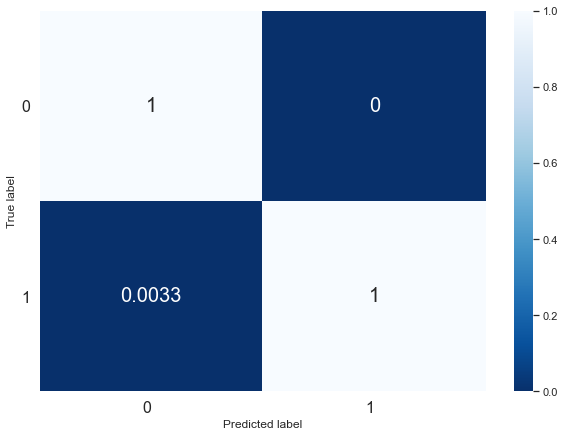

In [ ]:
#Plot the confusion matrix
cm_RF_best = confusion_matrix(y_test, rf_test, normalize='true')

df_cm_RF_best = pd.DataFrame(cm_RF_best, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_RF_best = sns.heatmap(df_cm_RF_best,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_RF_best.yaxis.set_ticklabels(heatmap_RF_best.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_RF_best.xaxis.set_ticklabels(heatmap_RF_best.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# While both the baseline and tuned RF estimators yielded the same f1-scores, 
# the latter is more computationally efficient with 48 less estimators than the former.

## eXtreme Gradient Boosting (XGBoost)


### Baseline Model with Resampled Data
#### Training

In [ ]:
# Import XGBoost library
import xgboost

In [ ]:
# Instantiate the XGBoost classifier
XGB_baseline = xgboost.XGBClassifier()

#Fit to the train dataset
XGB_baseline.fit(x_res,y_res)

/Users/josephlaurel/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Validation
##### Testing

In [ ]:
#Get predictions 

XGB_baseline_test = XGB_baseline.predict(x_test_s)

XGB_baseline_test

array([ True, False,  True, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,XGB_baseline_test))

# No change from the version 1 XGB baseline model

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       814
        True       1.00      1.00      1.00       303

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117



Text(0.5, 39.5, 'Predicted label')

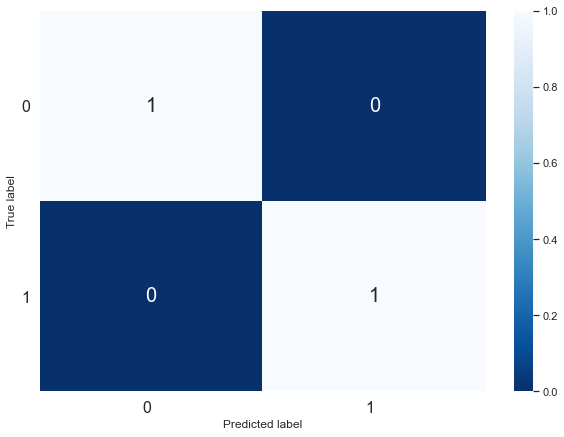

In [ ]:
#Plot the confusion matrix
cm_XGB_baseline = confusion_matrix(y_test, XGB_baseline_test, normalize='true')

df_cm_XGB_baseline = pd.DataFrame(cm_XGB_baseline, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_XGBbase = sns.heatmap(df_cm_XGB_baseline,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_XGBbase.yaxis.set_ticklabels(heatmap_XGBbase.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_XGBbase.xaxis.set_ticklabels(heatmap_XGBbase.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Better than version 2 RF optimized model since it generated perfect predictions

### Baseline Model without Resampled Data
#### Training

In [ ]:
# Instantiate the XGBoost classifier
XGB_baseline_nores = xgboost.XGBClassifier()

#Fit to the train dataset
XGB_baseline_nores.fit(x_train_s,y_train)

[13:15:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Validation
##### Testing

In [ ]:
#Get predictions 

XGB_baseline_test_nores = XGB_baseline_nores.predict(x_test_s)

XGB_baseline_test_nores

array([ True, False,  True, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,XGB_baseline_test_nores))

# No change from the XGB baseline with resampled data

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       814
        True       1.00      1.00      1.00       303

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117



Text(0.5, 39.5, 'Predicted label')

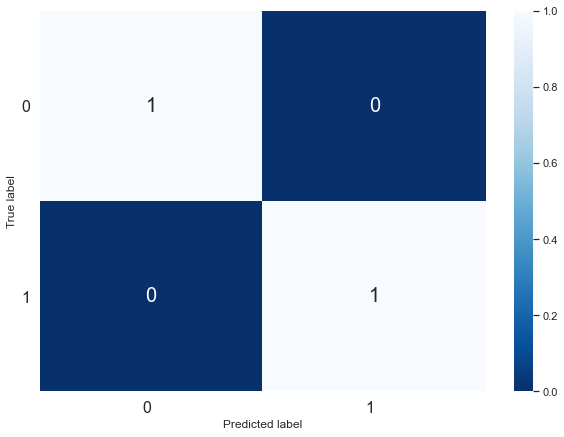

In [ ]:
#Plot the confusion matrix
cm_XGB_baseline_nores = confusion_matrix(y_test, XGB_baseline_test_nores, normalize='true')

df_cm_XGB_baseline_nores = pd.DataFrame(cm_XGB_baseline_nores, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_XGBbase_nores = sns.heatmap(df_cm_XGB_baseline_nores,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_XGBbase_nores.yaxis.set_ticklabels(heatmap_XGBbase_nores.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_XGBbase_nores.xaxis.set_ticklabels(heatmap_XGBbase_nores.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# No change from model with resampled data

### Tuned Model
#### Hyperparameter Tuning
Based on code by [Krish Naik](https://github.com/krishnaik06/Hyperparameter-Optimization/blob/master/Hyperparameter%20Optimization%20For%20Xgboost.ipynb)

In [ ]:
# Set XGBoost hyperparameters for testing

paramsXGB={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
# Create timer to check duration of hyperparameter tuning
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
## Instantiate the XGBoost classifier
#XGB_best=xgboost.XGBClassifier()

## Instantiate the randomized search CV using the hyperparameters for testing
#randomXGB=RandomizedSearchCV(XGB_best,param_distributions=paramsXGB,n_jobs=-1,cv=10,verbose=3, random_state=42)

In [ ]:
## Perform the randomized search CV
#from datetime import datetime

#start_time = timer(None) # timing starts from this point for "start_time" variable
#randomXGB.fit(x_train_s,y_train)
#timer(start_time) # timing ends here for "start_time" variable

## Return the best XGBoost estimator
#randomXGB.best_estimator_

#### Training

In [ ]:
# Instantiate XGBoost using the best parameters
XGBclassifier_best = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#Fit to the train dataset
XGBclassifier_best.fit(x_train_s,y_train)

[13:15:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# View XGB_baseline_nores parameters for comparison purposes
XGB_baseline_nores

# Baseline has higher learning_rate, higher colsample_bytree, lower gamma, higher max_depth, and lower min_child_weight

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Validation
##### Testing

In [ ]:
#Get predictions 

XGB_test_best = XGBclassifier_best.predict(x_test_s)

XGB_test_best

array([ True, False,  True, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,XGB_test_best))

# Hyperparameter optimization had no effect on the model results

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       814
        True       1.00      1.00      1.00       303

    accuracy                           1.00      1117
   macro avg       1.00      1.00      1.00      1117
weighted avg       1.00      1.00      1.00      1117



Text(0.5, 39.5, 'Predicted label')

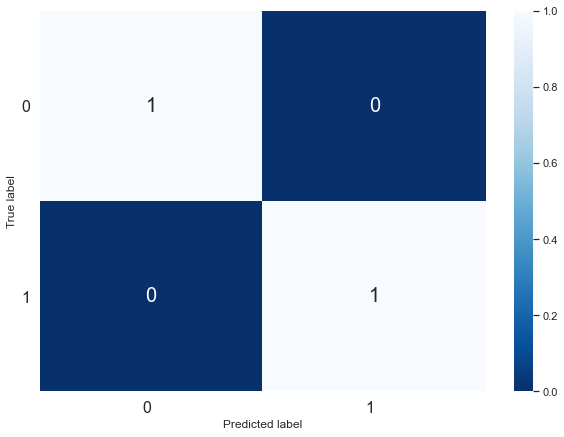

In [ ]:
#Plot the confusion matrix
cm_XGB_best = confusion_matrix(y_test, XGB_test_best, normalize='true')

df_cm_XGB_best = pd.DataFrame(cm_XGB_best, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_XGBbest = sns.heatmap(df_cm_XGB_best,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_XGBbest.yaxis.set_ticklabels(heatmap_XGBbest.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_XGBbest.xaxis.set_ticklabels(heatmap_XGBbest.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Baseline has higher learning_rate, higher colsample_bytree, lower gamma, higher max_depth, and lower min_child_weight

# Baseline XGB's higher learning_rate makes computation faster
# On the other hand, the baseline XGB's higher max_depth makes computation slower

# However, both XGB models have the same f1-scores

# Tuned XGB's lower colsample_bytree (number of columns used by each tree) makes computation faster
# Hence, the tuned XGB will be further analyzed using feature importance alongside the tuned RF model

# <b> Feature Importance

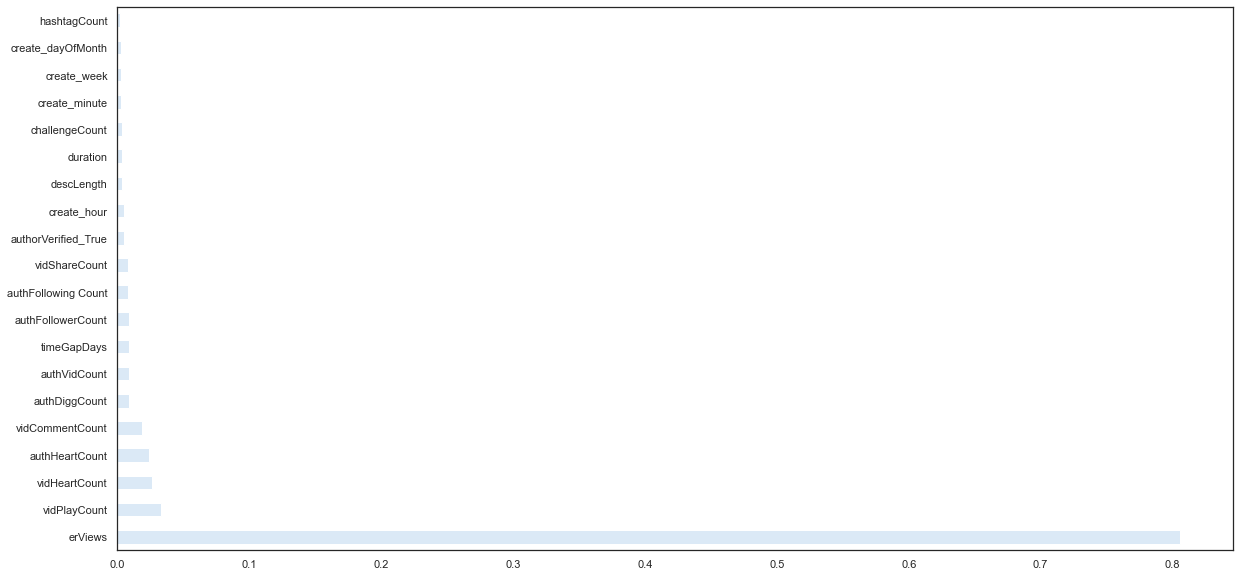

In [ ]:
# Generate the feature importance bar plot for the optimized Random Forest model
rf_best_feat_importances = pd.Series(rf_best.feature_importances_, index=x_train_sdf.columns)
rf_best_feat_importances.nlargest(20).plot(kind='barh')

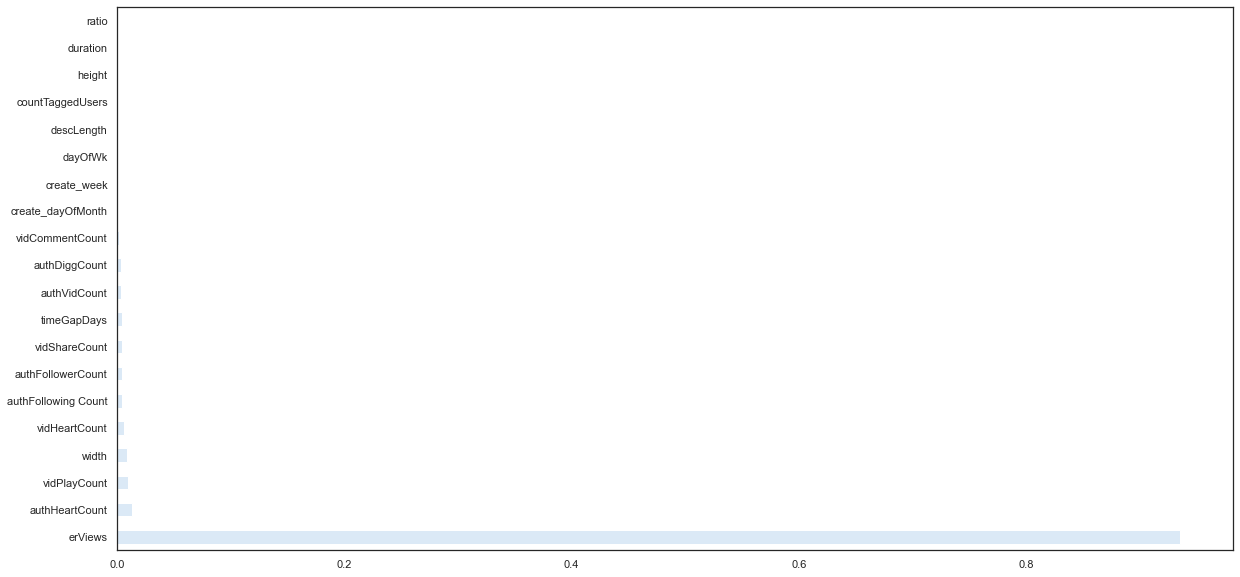

In [ ]:
# Generate the feature importance bar plot for the optimized XGBoost model
XGBclassifier_best_feat_importances = pd.Series(XGBclassifier_best.feature_importances_, index=x_train_sdf.columns)
XGBclassifier_best_feat_importances.nlargest(20).plot(kind='barh')

# <br><b> Model Building </b> - Revised Models without erViews
<p align = "justify"> 
The top performing Random Forest and XGBoost models (optimized models without resampled data) both generated accuracy scores of 100%. erViews had feature importance scores of over 80% for Random Forest and XGBoost, which is over 70% higher than that of the second most important features for both models. This suggests that the inclusion of the erViews feature overstates the accuracy of the classifiers. Hence, we will test the performance of the classifiers without this feature.
</p>

In [ ]:
# Drop erViews from the x_train dataset
x_train_s_drop_er = x_train_sdf.drop(columns=['erViews'])

# Drop erViews from the x_test dataset
x_test_s_drop_er = x_test_sdf.drop(columns=['erViews'])

## Drop erViews from the x_test numpy array
#x_test_array_drop_er = np.delete(x_test_s, x_test_s[26], axis=1)

### Tuned Random Forest Model without erViews
#### Hyperparameter Tuning

In [ ]:
# Number of trees in random forest
n_estimators_rf_drop = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

# Number of features to consider at every split
max_features_rf_drop = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth_rf_drop = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth_rf_drop.append(None)

# Minimum number of samples required to split a node
min_samples_split_rf_drop = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf_rf_drop = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid_rf_drop = {'n_estimators': n_estimators_rf_drop,
               'max_features': max_features_rf_drop,
               'max_depth': max_depth_rf_drop,
               'min_samples_split': min_samples_split_rf_drop,
               'min_samples_leaf': min_samples_leaf_rf_drop,
               'bootstrap': bootstrap}
               
print(random_grid_rf_drop)


{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
## Use the random grid to search for best hyperparameters

## First create the base model to tune
#rf = RandomForestClassifier()

## Random search of parameters, using 10 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_random_rf_drop = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf_drop, cv = 10, verbose=3, random_state=42, n_jobs = -1)

## Fit the random search model
#rf_random_rf_drop.fit(x_train_s, y_train)

## Show the Random Forest model with the best parameters
#rf_random_rf_drop.best_estimator_

####Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
rf_best_rf_drop = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=52)

#Fit to the train dataset
rf_best_rf_drop.fit(x_train_s_drop_er,y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=52)

####Model Validation
##### Testing

In [ ]:
#Get predictions 

rf_test_rf_drop = rf_best_rf_drop.predict(x_test_s_drop_er)

rf_test_rf_drop

array([ True, False, False, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,rf_test_rf_drop))

              precision    recall  f1-score   support

       False       0.84      0.98      0.91       814
        True       0.92      0.50      0.65       303

    accuracy                           0.85      1117
   macro avg       0.88      0.74      0.78      1117
weighted avg       0.86      0.85      0.84      1117



Text(0.5, 39.5, 'Predicted label')

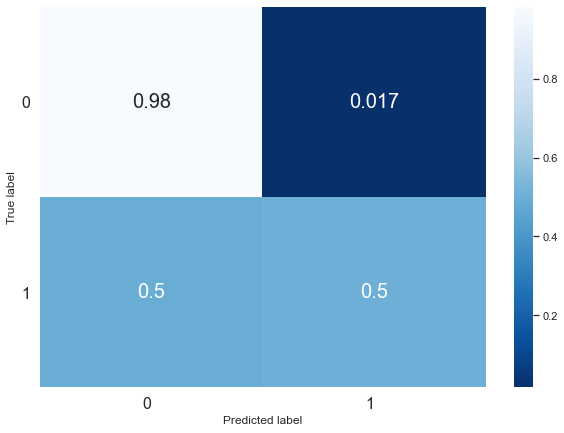

In [ ]:
#Plot the confusion matrix
cm_RF_best_rf_drop = confusion_matrix(y_test, rf_test_rf_drop, normalize='true')

df_cm_RF_best_rf_drop = pd.DataFrame(cm_RF_best_rf_drop, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_RF_best_rf_drop = sns.heatmap(df_cm_RF_best_rf_drop,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_RF_best_rf_drop.yaxis.set_ticklabels(heatmap_RF_best_rf_drop.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_RF_best_rf_drop.xaxis.set_ticklabels(heatmap_RF_best_rf_drop.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Resampling of Data without erViews
<p align = "justify">
Since the accuracy of the Random Forest classifier significantly decreased with the removal of the erViews feature, we will test whether SMOTE resampling will improve model performance.

In [ ]:
# Implement resampling
sm_drop = SMOTE(random_state=42, sampling_strategy=1)
x_res_drop, y_res_drop = sm_drop.fit_sample(x_train_s_drop_er, y_train)

x_res_drop.shape, y_res_drop.shape

((8658, 36), (8658,))

## Tuned Random Forest Model without erViews and with Resampled Data
#### Hyperparameter Tuning

In [ ]:
## Use the random grid to search for best hyperparameters

## First create the base model to tune
#rf = RandomForestClassifier()

## Random search of parameters, using 10 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_random_rf_drop_res = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf_drop, cv = 10, verbose=3, random_state=42, n_jobs = -1)

## Fit the random search model
#rf_random_rf_drop_res.fit(x_res_drop, y_res_drop)

## Show the Random Forest model with the best parameters
#rf_random_rf_drop_res.best_estimator_

####Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
rf_best_rf_drop_res = RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       n_estimators=200)

#Fit to the train dataset
rf_best_rf_drop_res.fit(x_res_drop,y_res_drop)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       n_estimators=200)

####Model Validation
##### Testing

In [ ]:
#Get predictions 

rf_test_rf_drop_res = rf_best_rf_drop_res.predict(x_test_s_drop_er)

rf_test_rf_drop_res

array([ True, False, False, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,rf_test_rf_drop_res))

# SMOTE improved the f1-score of True by 9%

              precision    recall  f1-score   support

       False       0.86      0.95      0.90       814
        True       0.81      0.59      0.69       303

    accuracy                           0.85      1117
   macro avg       0.84      0.77      0.79      1117
weighted avg       0.85      0.85      0.84      1117



Text(0.5, 39.5, 'Predicted label')

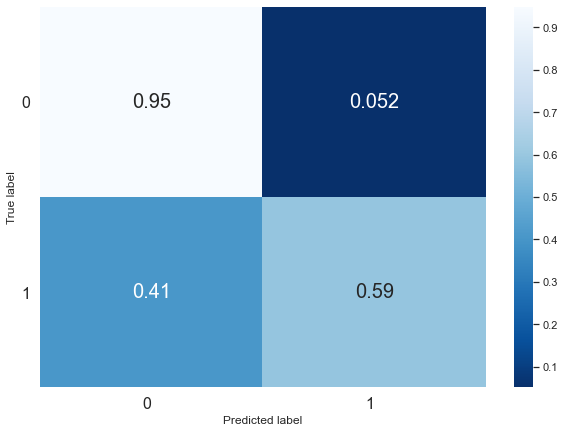

In [ ]:
#Plot the confusion matrix
cm_RF_best_rf_drop_res = confusion_matrix(y_test, rf_test_rf_drop_res, normalize='true')

df_cm_RF_best_rf_drop_res = pd.DataFrame(cm_RF_best_rf_drop_res, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_RF_best_rf_drop_res = sns.heatmap(df_cm_RF_best_rf_drop_res,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_RF_best_rf_drop_res.yaxis.set_ticklabels(heatmap_RF_best_rf_drop_res.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_RF_best_rf_drop_res.xaxis.set_ticklabels(heatmap_RF_best_rf_drop_res.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

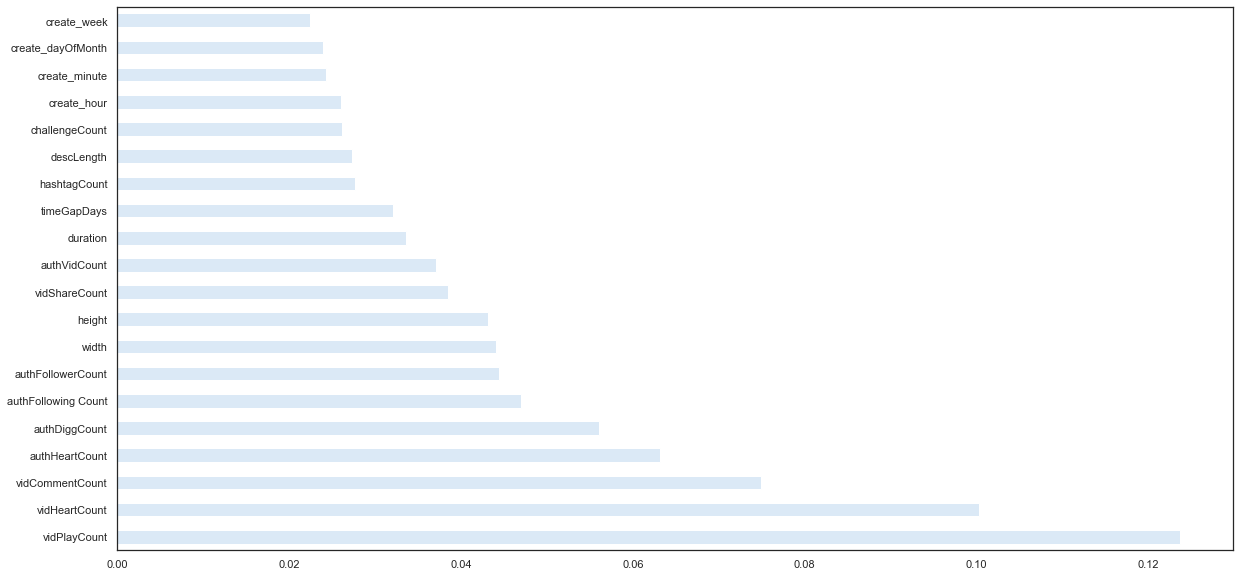

In [ ]:
rf_best_rf_drop_res_feat_importances = pd.Series(rf_best_rf_drop_res.feature_importances_, index=x_res_drop.columns)
rf_best_rf_drop_res_feat_importances.nlargest(20).plot(kind='barh')

## Tuned XGBoost without erViews and with Resampled Data
### Hyperparameter Tuning

In [ ]:
## Instantiate the XGBoost classifier
#XGB_best_drop_res = xgboost.XGBClassifier()

## Instantiate the randomized search CV using the hyperparameters for testing
#randomXGB_drop_res =RandomizedSearchCV(XGB_best_drop_res,param_distributions=paramsXGB,n_jobs=-1,cv=10,verbose=3, random_state=42)

In [ ]:
## Perform the randomized search CV
#from datetime import datetime

#start_time = timer(None) # timing starts from this point for "start_time" variable
#randomXGB_drop_res.fit(x_res_drop,y_res_drop)
#timer(start_time) # timing ends here for "start_time" variable

## Return the best XGBoost estimator
#randomXGB_drop_res.best_estimator_

####Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
XGB_best_drop_res = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#Fit to the train dataset
XGB_best_drop_res.fit(x_res_drop,y_res_drop)

/Users/josephlaurel/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

####Model Validation
##### Testing

In [ ]:
#Get predictions 

test_XGB_best_drop_res = XGB_best_drop_res.predict(x_test_s_drop_er)

test_XGB_best_drop_res

array([ True, False,  True, ..., False, False, False])

#####Performance Metrics

In [ ]:
print(classification_report(y_test,test_XGB_best_drop_res))

# This XGB classifier outperformed the tuned Random Forest model without erViews and with resampled data

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       814
        True       0.95      0.91      0.93       303

    accuracy                           0.96      1117
   macro avg       0.96      0.95      0.95      1117
weighted avg       0.96      0.96      0.96      1117



Text(0.5, 39.5, 'Predicted label')

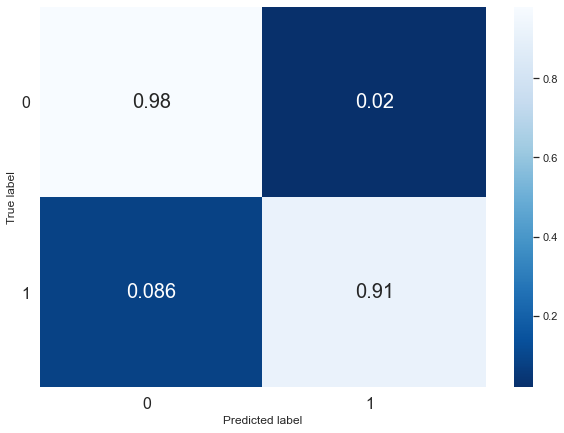

In [ ]:
#Plot the confusion matrix
cm_XGB_best_drop_res = confusion_matrix(y_test, test_XGB_best_drop_res, normalize='true')

df_cm_XGB_best_drop_res = pd.DataFrame(cm_XGB_best_drop_res, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_XGB_best_drop_res  = sns.heatmap(df_cm_XGB_best_drop_res,annot=True,annot_kws={"size": 20}, cmap='Blues_r')

#Heatmap attributes
heatmap_XGB_best_drop_res.yaxis.set_ticklabels(heatmap_XGB_best_drop_res.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_XGB_best_drop_res.xaxis.set_ticklabels(heatmap_XGB_best_drop_res.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

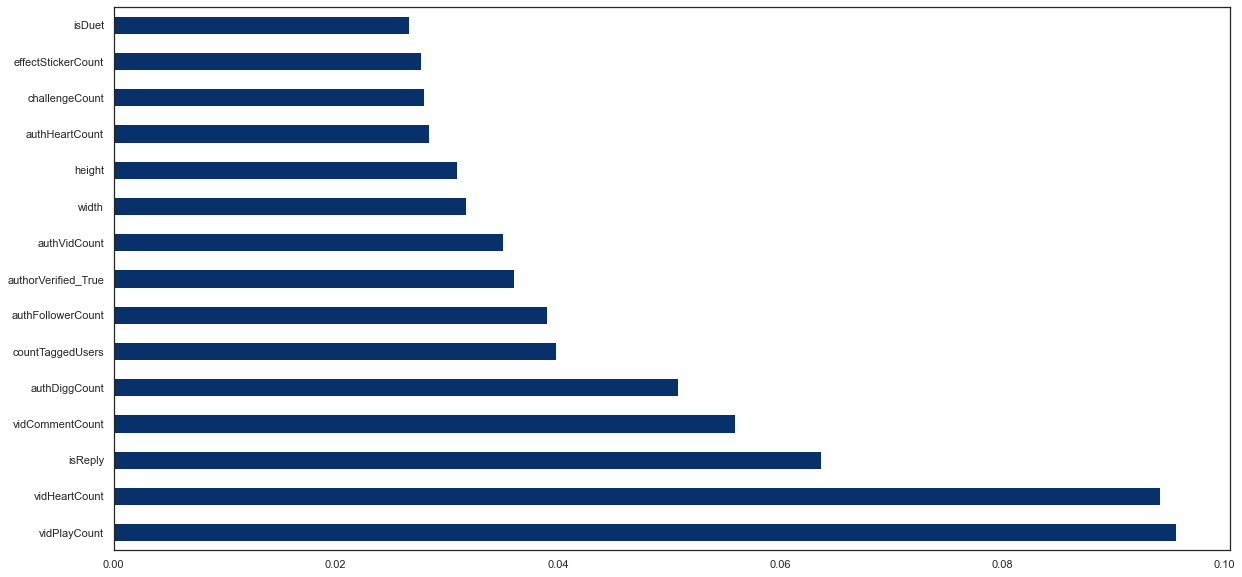

In [ ]:
XGB_best_drop_res_feat_importances = pd.Series(XGB_best_drop_res.feature_importances_, index=x_res_drop.columns)
XGB_best_drop_res_feat_importances.nlargest(15).plot(kind='barh', cmap='Blues_r', )

## <br> Tuned KNN Model without erViews and with Resampled Data
<p align='justify'>
An optimized KNN model without the erViews feature and with resampled data will be tested to provide a baseline for comparison with the revised Random Forest and XGBoost models. </p>

### <br> Hyperparameter Tuning

In [ ]:
knn_tuned = KNeighborsClassifier()
param_grid_knn = {'n_neighbors' : [40,50,60,70,80,90,100],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
knn_random_drop = RandomizedSearchCV(knn_tuned, param_distributions = param_grid_knn, cv = 10, verbose = 3, n_jobs = -1, random_state=42)

## Fit the random search model
#knn_random_drop.fit(x_res_drop,y_res_drop)

## Return best KNN estimator
#knn_random_drop.best_estimator_

## The best parameters for this optimized KNN model are the same with those of the previous optimized KNN model

### Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
knn_best_drop = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=60, p=1,
                     weights='distance')

#Fit to the train dataset
knn_best_drop.fit(x_res_drop,y_res_drop)

### Model Validation
#### Testing

In [ ]:
#Get predictions 

knn_best_test_drop = knn_best_drop.predict(x_test_s_drop_er)

knn_best_test_drop

#### Performance Metrics

In [ ]:
print(classification_report(y_test,knn_best_test_drop))

# The False f1-score decreased from the previous tuned KNN model while the True f1-score increased

In [ ]:
#Plot the confusion matrix
cm_knn_best_drop = confusion_matrix(y_test, knn_best_test_drop, normalize='true')

df_cm_knn_best_drop = pd.DataFrame(cm_knn_best_drop, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_knn_best_drop = sns.heatmap(df_cm_knn_best_drop,annot=True,annot_kws={"size": 20}, cmap="Blues_r")

#Heatmap attributes
heatmap_knn_best_drop.yaxis.set_ticklabels(heatmap_knn_best_drop.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_knn_best_drop.xaxis.set_ticklabels(heatmap_knn_best_drop.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## <br> Naive Bayes Model without erViews and with Resampled Data
<p align='justify'>
A Naive Bayes model without the erViews feature and with resampled data will be tested to provide a baseline for comparison with the revised Random Forest, XGBoost, and revised tuned KNN models. </p>

### Training

In [ ]:
#Instantiate the Algorithm 
gnb_drop = GaussianNB()

#Train the model
gnb_drop.fit(x_res_drop,y_res_drop)

### Model Validation
#### Testing

In [ ]:
#Get predictions 

NB_test_drop = gnb_drop.predict(x_test_s_drop_er)

NB_test_drop

#### Performance Metrics

In [ ]:
print(classification_report(y_test, NB_test_drop))

# The f1-scores for both False and True are lower than that of the Naive Bayes model without resampled data and with the erViews feature 

In [ ]:
#Plot the confusion matrix
cm_NB_drop = confusion_matrix(y_test, NB_test_drop, normalize='true')

df_cm_NB_drop = pd.DataFrame(cm_NB_drop, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_NB_drop = sns.heatmap(df_cm_NB_drop,annot=True,annot_kws={"size": 20}, cmap="Blues_r")

#Heatmap attributes
heatmap_NB_drop.yaxis.set_ticklabels(heatmap_NB_drop.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_NB_drop.xaxis.set_ticklabels(heatmap_NB_drop.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Single Learning Algorithms without erViews and without Resampled Data
<p align='justify'>
Since the KNN and Naive Bayes algorithms previously gave better results without resampled data, we will test the performance of these classifiers without the erViews feature and no resampled data.

In [ ]:
# Drop erViews from the non-resampled training data
x_train_nores_drop_er = x_train_sdf.drop(columns=['erViews'])

# Drop erViews from the non-resampled test data
x_test_nores_drop_er = x_test_sdf.drop(columns=['erViews'])

### <br> Tuned KNN Model
#### Hyperparameter Tuning

In [ ]:
knn_tuned = KNeighborsClassifier()
param_grid_knn = {'n_neighbors' : [40,50,60,70,80,90,100],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
knn_random_drop_nores = RandomizedSearchCV(knn_tuned, param_distributions = param_grid_knn, cv = 10, verbose = 3, n_jobs = -1, random_state=42)

## Fit the random search model
#knn_random_drop_nores.fit(x_train_nores_drop_er,y_train)

## Return best KNN estimator
#knn_random_drop_nores.best_estimator_

## The best parameters for this optimized KNN model are the same as those of the previous optimized KNN models

#### Training

In [ ]:
# Instantiate the algorithm using the best parameters generated by RandomizedSearchCV
knn_best_drop_nores = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=60, p=1,
                     weights='distance')

#Fit to the train dataset
knn_best_drop_nores.fit(x_train_nores_drop_er,y_train)

#### Model Validation
##### Testing

In [ ]:
#Get predictions 

knn_best_test_drop_nores = knn_best_drop_nores.predict(x_test_nores_drop_er)

knn_best_test_drop_nores

##### Performance Metrics

In [ ]:
print(classification_report(y_test,knn_best_test_drop_nores))

# The False f1-score while the True f1-score decreased due to the removal of resampled data
# However, overall accuracy improved

In [ ]:
#Plot the confusion matrix
cm_knn_best_drop_nores = confusion_matrix(y_test, knn_best_test_drop_nores, normalize='true')

df_cm_knn_best_drop_nores = pd.DataFrame(cm_knn_best_drop_nores, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_cm_knn_best_drop_nores = sns.heatmap(df_cm_knn_best_drop_nores,annot=True,annot_kws={"size": 20}, cmap="Blues_r")

#Heatmap attributes
heatmap_cm_knn_best_drop_nores.yaxis.set_ticklabels(heatmap_cm_knn_best_drop_nores.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_cm_knn_best_drop_nores.xaxis.set_ticklabels(heatmap_cm_knn_best_drop_nores.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### <br> Naive Bayes Model

#### Training

In [ ]:
#Instantiate the Algorithm 
gnb_drop_nores = GaussianNB()

#Train the model
gnb_drop_nores.fit(x_train_nores_drop_er,y_train)

#### Model Validation
##### Testing

In [ ]:
#Get predictions 

NB_test_drop_nores = gnb_drop.predict(x_test_nores_drop_er)

NB_test_drop_nores

##### Performance Metrics

In [ ]:
print(classification_report(y_test, NB_test_drop_nores))

# The f1-score of False significantly improved while the f1-score of True decreased by 1%

In [ ]:
#Plot the confusion matrix
cm_NB_drop_nores = confusion_matrix(y_test, NB_test_drop_nores, normalize='true')

df_cm_NB_drop_nores = pd.DataFrame(cm_NB_drop_nores, index=[0,1], columns=[0,1])

#Plot Attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap_NB_drop_nores = sns.heatmap(df_cm_NB_drop_nores,annot=True,annot_kws={"size": 20}, cmap="Blues_r")

#Heatmap attributes
heatmap_NB_drop_nores.yaxis.set_ticklabels(heatmap_NB_drop_nores.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap_NB_drop_nores.xaxis.set_ticklabels(heatmap_NB_drop_nores.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')